### dreambank.net

Dreambank - data: http://www.dreambank.net/

website com tudo: https://dreams.ucsc.edu/

e-mail: dreams@dreamresearch.net 

In [1]:
import time
start_time = time.time()

### Contents

0) [Data](#data)\
1) [Text pre-processing](#pre_processing)\
2) [Text parsing & Exploratory Data Analysis](#parsing_eda)\
2.1) [All & Top dreamers](#top_all_dreamers)\
2.2) [Individual dreamer](#individual_dreamer)\
3) [Text Representation & Feature Engineering](#fe)\
4) [Modeling / Pattern Mining](#modeling)\
5) [Evaluation](#evaluation)

In [2]:
# usual
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from collections import Counter, defaultdict
import inspect
import time
import datetime 
import warnings

# text
import re
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from nltk.tokenize import regexp_tokenize, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from polyglot.text import Text
from polyglot.detect import Detector
from textatistic import Textatistic
import textatistic
import spacy
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from langdetect import detect_langs
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import TruncatedSVD
import pyLDAvis
import glob
from corextopic import corextopic as ct
import mglearn
from spellchecker import SpellChecker
from autocorrect import Speller

from sklearn.manifold import TSNE
import umap

# train_test, weights, pipe
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer

# classifiers
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score

C:\Users\Admin\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\A

In [3]:
data_folder = ''

# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

## 0) Data
<a id="data"></a>

In [4]:
dreambank = pd.read_excel('dreambank.xlsx')

## 1) Text pre-processing
<a id="pre_processing"></a>

In [5]:
dreambank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125310 entries, 0 to 125309
Data columns (total 5 columns):
<dreambank>                        1 non-null object
individual_collection              120 non-null object
id_name_type_sex_age_time_dream    39844 non-null object
number_date_report                 60185 non-null object
codings                            25160 non-null object
dtypes: object(5)
memory usage: 4.8+ MB


In [6]:
# delete unnecessary column
del dreambank['<dreambank>']

In [7]:
# head
dreambank.head(12)

,individual_collection,id_name_type_sex_age_time_dream,number_date_report,codings
0,<collection>,NaN,NaN,NaN
1,NaN,<id>alta</id>,NaN,NaN
2,NaN,<name>Alta: a detailed dreamer</name>,NaN,NaN
3,NaN,<type>series</type>,NaN,NaN
4,NaN,<sex>F</sex>,NaN,NaN
5,NaN,<age>A</age>,NaN,NaN
6,NaN,<time>1985-1997</time>,NaN,NaN
7,NaN,<dream>,NaN,NaN
8,NaN,NaN,<number>1</number>,NaN
9,NaN,NaN,<date>1957</date>,NaN


In [8]:
# dreambank.net codings - ver dps
dreambank['codings'].value_counts().head(10)

<mod>I+</mod>                              754
<obj>AR</obj>                              648
<char>1MKA</char>                          574
<act><code>M</code><init>D</init></act>    537
<obj>TR</obj>                              492
<char>1FKA</char>                          486
<act><code>P</code><init>D</init></act>    476
<act><code>S</code><init>D</init></act>    462
<obj>HH</obj>                              459
<obj>NA</obj>                              424
Name: codings, dtype: int64

In [9]:
# 60 individuals
dreambank.individual_collection.value_counts()

</collection>    60
<collection>     60
Name: individual_collection, dtype: int64

In [10]:
# 19743 dreams
dreambank.id_name_type_sex_age_time_dream.value_counts().head(20)

</dream>                    19743
<dream>                     19743
<type>series</type>            44
<sex>F</sex>                   33
<sex>M</sex>                   27
<age>Y</age>                   24
<age>A</age>                   21
<type>set</type>               16
<age>T</age>                    9
<age>C</age>                    4
<time>1998</time>               3
<time>mid-1990s</time>          3
<time>1996</time>               3
<time>1970</time>               2
<time>1962</time>               2
<time>1940s-1950s</time>        2
<time>1996-1997</time>          2
<time>1963-1965</time>          2
<id>ucsc_women</id>             1
<id>melvin</id>                 1
Name: id_name_type_sex_age_time_dream, dtype: int64

In [11]:
dreambank.head(15)

,individual_collection,id_name_type_sex_age_time_dream,number_date_report,codings
0,<collection>,NaN,NaN,NaN
1,NaN,<id>alta</id>,NaN,NaN
2,NaN,<name>Alta: a detailed dreamer</name>,NaN,NaN
3,NaN,<type>series</type>,NaN,NaN
4,NaN,<sex>F</sex>,NaN,NaN
5,NaN,<age>A</age>,NaN,NaN
6,NaN,<time>1985-1997</time>,NaN,NaN
7,NaN,<dream>,NaN,NaN
8,NaN,NaN,<number>1</number>,NaN
9,NaN,NaN,<date>1957</date>,NaN


In [12]:
# create 'id' column

def recode_id(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<id>"):
        return line[4:-5]
    else:
        return np.nan

dreambank['id'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_id).fillna(method='ffill')

# id's
dreambank.id.value_counts().head(10)

b              18131
norms-f        12850
norms-m        12156
kenneth        10118
emma            9161
norman          6183
b2              5698
pegasus         5473
dorothea        4507
hall_female     3413
Name: id, dtype: int64

In [13]:
# create 'name' column

def recode_name(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<name>"):
        return line[6:-7]
    else:
        return np.nan

dreambank['name'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_name).fillna(method='ffill')

# names
dreambank.name.value_counts().head(10)

Barb Sanders                    18131
Hall/VdC Norms: Female          12850
Hall/VdC Norms: Male            12156
Kenneth                         10118
Emma: 48 years of dreams         9161
Norman: a child molester         6183
Barb Sanders #2                  5698
Pegasus: a factory worker        5473
Dorothea: 53 years of dreams     4507
College women, late 1940s        3413
Name: name, dtype: int64

In [14]:
# create 'type' column

def recode_type(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<type>"):
        return line[6:-7]
    else:
        return np.nan

dreambank['type'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_type).fillna(method='ffill')

# types
dreambank.type.value_counts()

series    85616
set       39691
Name: type, dtype: int64

In [15]:
# create 'sex' column

def recode_sex(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<sex>"):
        return line[5:-6]
    else:
        return np.nan

dreambank['sex'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_sex).fillna(method='ffill')

# genders
print(dreambank.sex.value_counts())

dreambank.drop_duplicates('name').sex.value_counts()

F    76518
M    48788
Name: sex, dtype: int64


F    32
M    27
Name: sex, dtype: int64

In [16]:
# create 'age' column

def recode_age(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<age>"):
        return line[5:-6]
    else:
        return np.nan

dreambank['age'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_age).fillna(method='ffill')

# ages
dreambank.age.value_counts()

Y     51958
A     45159
YA    18131
T      7566
C      1933
TY      558
Name: age, dtype: int64

In [17]:
# create 'time' column

def recode_time(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<time>"):
        return line[6:-7]
    else:
        return np.nan

dreambank['time'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_time).fillna(method='ffill')

# time
dreambank.time.value_counts().head()

1940s-1950s    25006
1960-1997      18131
1996-1998      10118
1949-1997       9161
1963-1967       6183
Name: time, dtype: int64

In [18]:
# replace '1940s-1950s' with '1940-1950'
dreambank['time'] = dreambank['time'].replace('1940s-1950s', '1940-1950')

# time
dreambank.time.value_counts()

1940-1950     25006
1960-1997     18131
1996-1998     10118
1949-1997      9161
1963-1967      6183
1997-2001      5698
1949-1964      5473
1912-1965      4507
1946-1950      3413
2003-2005      3217
1970           3079
mid-1990s      2463
1963-1965      2241
1985-1997      2118
1996-1997      1956
2001-2003      1748
1980-2002      1746
1962           1711
1999-2000      1583
1998           1544
2003-2004      1478
1939           1178
1971           1108
1992-1998      1068
1996           1014
2000-2001       938
2004            908
1990-1999       838
1957-1959       538
1968            508
1997-2000       498
1991-1993       486
1998-2000       453
2000            443
1897-1918       438
1940-1998       367
2007-2010       323
1992-1999       323
1997            184
1995            178
mid-1980s       176
2003-2006       173
late 1990s      160
1997-1999       123
1990s           116
1948-1949       103
1964             88
Name: time, dtype: int64

In [19]:
dreambank.head(15)

,individual_collection,id_name_type_sex_age_time_dream,number_date_report,codings,id,name,type,sex,age,time
0,<collection>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,<id>alta</id>,NaN,NaN,alta,NaN,NaN,NaN,NaN,NaN
2,NaN,<name>Alta: a detailed dreamer</name>,NaN,NaN,alta,Alta: a detailed dreamer,NaN,NaN,NaN,NaN
3,NaN,<type>series</type>,NaN,NaN,alta,Alta: a detailed dreamer,series,NaN,NaN,NaN
4,NaN,<sex>F</sex>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,NaN,NaN
5,NaN,<age>A</age>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,A,NaN
6,NaN,<time>1985-1997</time>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,A,1985-1997
7,NaN,<dream>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,A,1985-1997
8,NaN,NaN,<number>1</number>,NaN,alta,Alta: a detailed dreamer,series,F,A,1985-1997
9,NaN,NaN,<date>1957</date>,NaN,alta,Alta: a detailed dreamer,series,F,A,1985-1997


In [20]:
# create 'dream_number' & 'dream_date' columns

# number
def recode_number(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<number>"):
        return line[8:-9]
    else:
        return np.nan
    
# date
def recode_date(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<date>"):
        return line[6:-7]
    else:
        return np.nan  

dreambank['dream_number'] = dreambank['number_date_report'].apply(recode_number).fillna(method='ffill')
dreambank['dream_date'] = dreambank['number_date_report'].apply(recode_date).fillna(method='ffill')

In [21]:
# dream_number
dreambank.dream_number.value_counts().head(20)
dreambank.dream_number.value_counts().tail(10)

F29-4     4
F36-3     4
F11-1     4
F21-1     4
M43-7     4
M47-7     4
M36-2     4
103-36    4
M13-6     4
F23-6     3
Name: dream_number, dtype: int64

In [22]:
# dream_date
dreambank.dream_date.value_counts().head(10)

06/19/66       25029
02/06/64        3107
10/18/97        3092
F, age 16        330
8/16/97          232
5/9/97           220
F, age 17        210
10/06/65         207
[age 20-21]      193
07/25/2000       189
Name: dream_date, dtype: int64

**Dreams column**

In [23]:
# dream example
dreambank['number_date_report'][10]

"<report><![CDATA[The one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a little bridge over a creek, then double back and she drops me off at the house again. Inside (?) I sit with a couple of people, playing with a string of blue balloons.]]></report>"

In [24]:
# create 'dream' column

def recode_dream(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<report>"):
        return line[17:-12]
    else:
        return np.nan

dreambank['dream'] = dreambank['number_date_report'].apply(recode_dream)

dreambank.head()

,individual_collection,id_name_type_sex_age_time_dream,number_date_report,codings,id,name,type,sex,age,time,dream_number,dream_date,dream
0,<collection>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,<id>alta</id>,NaN,NaN,alta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,<name>Alta: a detailed dreamer</name>,NaN,NaN,alta,Alta: a detailed dreamer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,<type>series</type>,NaN,NaN,alta,Alta: a detailed dreamer,series,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,<sex>F</sex>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,NaN,NaN,NaN,NaN,NaN


In [25]:
# codings
dreambank.codings.value_counts()

<mod>I+</mod>                                                        754
<obj>AR</obj>                                                        648
<char>1MKA</char>                                                    574
<act><code>M</code><init>D</init></act>                              537
<obj>TR</obj>                                                        492
<char>1FKA</char>                                                    486
<act><code>P</code><init>D</init></act>                              476
<act><code>S</code><init>D</init></act>                              462
<obj>HH</obj>                                                        459
<obj>NA</obj>                                                        424
<obj>CL</obj>                                                        416
<emot><code>AP</code><char>D</char></emot>                           414
<mod>S+</mod>                                                        388
<obj>AD</obj>                                      

## 2) Text parsing & Exploratory Data Analysis
<a id="parsing_eda"></a>

In [26]:
# Select data with dreams df
dreams_df = dreambank[dreambank['dream'].notnull()][['id', 'name', 'type', 'sex', 'age', 'time',
                                                 'dream_number', 'dream_date', 'dream']].reset_index(drop=True)

# ver depois a coluna dos codings (não incluí) --> classificação dos sentimentos feito por eles, dreambank

# new df
dreams_df.head(15)

,id,name,type,sex,age,time,dream_number,dream_date,dream
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,"The one at the Meads's house, where it's bigge..."
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,"I am in some public place, reminds me of the g..."
2,alta,Alta: a detailed dreamer,series,F,A,1985-1997,100,5/30/86,"I'm driving a car somewhere, because it's sout..."
3,alta,Alta: a detailed dreamer,series,F,A,1985-1997,101,5/31/86,"I'm around a bunch of people working together,..."
4,alta,Alta: a detailed dreamer,series,F,A,1985-1997,102,5/31/86,I'm in a house - I don't think it's mine - the...
5,alta,Alta: a detailed dreamer,series,F,A,1985-1997,103,6/7/86,I'm out someplace pretty far from home and I w...
6,alta,Alta: a detailed dreamer,series,F,A,1985-1997,104,6/7/86,I'm on a bus with a couple of guys - one's the...
7,alta,Alta: a detailed dreamer,series,F,A,1985-1997,105,6/9/86,I live in a little house a bit like Grandmom's...
8,alta,Alta: a detailed dreamer,series,F,A,1985-1997,106,6/11/86,"I'm on a bus, going to the dentist, across an ..."
9,alta,Alta: a detailed dreamer,series,F,A,1985-1997,107,6/15/86,I've just gotten home from school - I live in ...


In [27]:
# dtype
dreams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 9 columns):
id              19431 non-null object
name            19431 non-null object
type            19431 non-null object
sex             19431 non-null object
age             19431 non-null object
time            19431 non-null object
dream_number    19431 non-null object
dream_date      19431 non-null object
dream           19431 non-null object
dtypes: object(9)
memory usage: 1.3+ MB


In [28]:
%%time
# replace "<BR>" and "&nbsp;" - There could be other things like this. (descobri com a emma)
def pre_process_text(text):
    new_text = text.replace('<BR>', '').replace('&nbsp;', '')
    return new_text
    
dreams_df['dream'] = dreams_df['dream'].apply(pre_process_text)

Wall time: 52 ms


In [29]:
# remove '<TABLE' and following text: includes 'Interpretation', 'Answers to questions', and more

# function for retrieving the dream text only
def table_dream(text):
    if '<TABLE' in text:
        text_dream = text.rsplit('<TABLE', 1)[0]
        return text_dream
    else:
        return text
    
# function for retrieving the table text only
def table_table(text):
    if '<TABLE' in text:
        text_table = text.rsplit('<TABLE', 1)[1]
        return text_table
    else:
        return np.nan

# move the <TABLE' part to a new column (make this first)
dreams_df['dream_table'] = dreams_df['dream'].apply(table_table)

# remove the '<TABLE' part
dreams_df['dream'] = dreams_df['dream'].apply(table_dream)

dreams_df.head()

,id,name,type,sex,age,time,dream_number,dream_date,dream,dream_table
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,"The one at the Meads's house, where it's bigge...",NaN
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,"I am in some public place, reminds me of the g...",NaN
2,alta,Alta: a detailed dreamer,series,F,A,1985-1997,100,5/30/86,"I'm driving a car somewhere, because it's sout...",NaN
3,alta,Alta: a detailed dreamer,series,F,A,1985-1997,101,5/31/86,"I'm around a bunch of people working together,...",NaN
4,alta,Alta: a detailed dreamer,series,F,A,1985-1997,102,5/31/86,I'm in a house - I don't think it's mine - the...,NaN


## 2.1) All & Top dreamers
<a id="top_all_dreamers"></a>

### 2.1.1) Gender distribution

F    11748
M     7683
Name: sex, dtype: int64


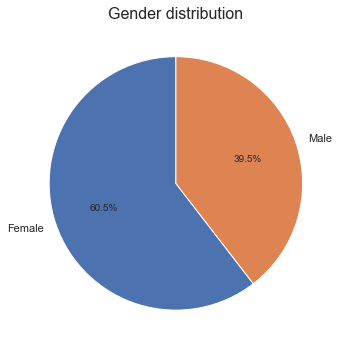

In [30]:
# Gender distribution of dreams
print(dreams_df['sex'].value_counts())

gender_dist = dreams_df['sex'].value_counts()

labels = ["Female", "Male"]
sizes = [gender_dist['F']/gender_dist.sum(), gender_dist['M']/gender_dist.sum()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)  # 
plt.title("Gender distribution", fontsize=16)
plt.ylabel("")
plt.subplots_adjust(left=0, bottom=-0.1, right=2, top=1, wspace=0, hspace=0)
plt.show()

### 2.1.2) Age distribution

A     8229
Y     6515
YA    3116
T     1080
C      381
TY     110
Name: age, dtype: int64


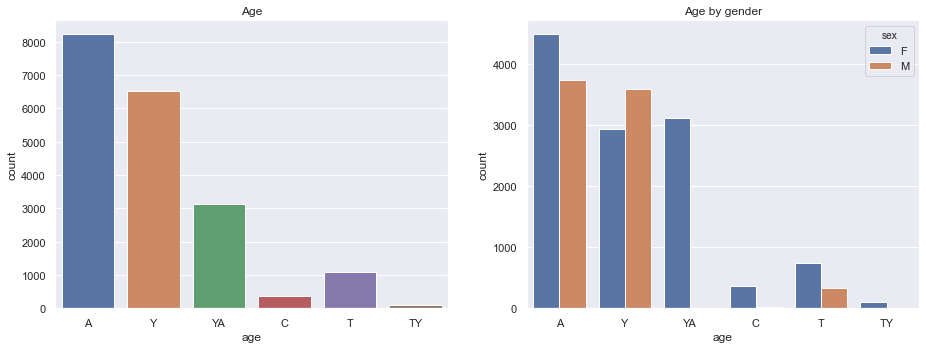

In [31]:
# Age distribution of dreams
print(dreams_df['age'].value_counts())

# bar plot
plt.subplot(1, 2, 1)
sns.countplot('age', data=dreams_df)
plt.title('Age')

plt.subplot(1, 2, 2)
sns.countplot('age', data=dreams_df, hue='sex')
plt.title('Age by gender')

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

### 2.1.3) Top dreamers, dreams per year

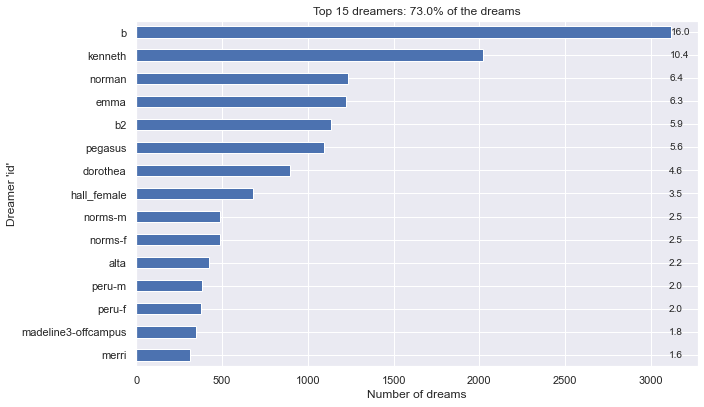

In [32]:
# top dreamers

# number of dreamers
n = 15

top_dreamers = dreams_df['id'].value_counts(ascending=True).tail(n)#.plot(kind='barh')

dreams_df_index = dreams_df['id'].value_counts().index
pos = np.arange(len(top_dreamers))
pos_2 = round(top_dreamers/len(dreams_df['dream'])*100, 1)

# add the percentages to the side of each bar
for p, cidx, td in zip(pos, dreams_df_index, pos_2):
    plt.annotate(td, xy=(td+3100, p), va='center')

# plot
top_dreamers.plot(kind='barh')

t = round(np.sum(top_dreamers/len(dreams_df['dream'])*100))   
plt.title("Top {} dreamers: {}% of the dreams".format(n, t))
plt.xlabel("Number of dreams")
plt.ylabel("Dreamer 'id'")
plt.subplots_adjust(left=0, bottom=-0.2, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

In [33]:
dreams_df.head()

,id,name,type,sex,age,time,dream_number,dream_date,dream,dream_table
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,"The one at the Meads's house, where it's bigge...",NaN
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,"I am in some public place, reminds me of the g...",NaN
2,alta,Alta: a detailed dreamer,series,F,A,1985-1997,100,5/30/86,"I'm driving a car somewhere, because it's sout...",NaN
3,alta,Alta: a detailed dreamer,series,F,A,1985-1997,101,5/31/86,"I'm around a bunch of people working together,...",NaN
4,alta,Alta: a detailed dreamer,series,F,A,1985-1997,102,5/31/86,I'm in a house - I don't think it's mine - the...,NaN


In [34]:
# repeated dreams
dreams_df.dream.value_counts().head(3)   # só 1 sonho repetido

I was working in a printing plant.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [35]:
# number of dreams in each year

range_years_4 = range(1933, 2020)
range_years_2 = ['%02d' % t for t in np.arange(0, 100)]

# 1933 - 2019
four_digits = pd.Series([np.sum(dreams_df.dream_date.str.contains(str(i))) for i in range_years_4], index=range_years_4)

# /00 - /99
two_digits = pd.Series([np.sum(dreams_df.dream_date.str.endswith('/{}'.format(i))) for i in range_years_2], 
                       index=range_years_2)

In [36]:
# 2000 - 2019
a = two_digits[:20]
b = four_digits[-20:]
a.index = b.index
c_1 = a.add(b, fill_value=0)

# 1933 - 1999
d = two_digits[33:]
e = four_digits[:-20]
d.index = e.index
c_2 = d.add(e, fill_value=0)

# join c_1 and c_2
total_years = c_1.add(c_2, fill_value=0)

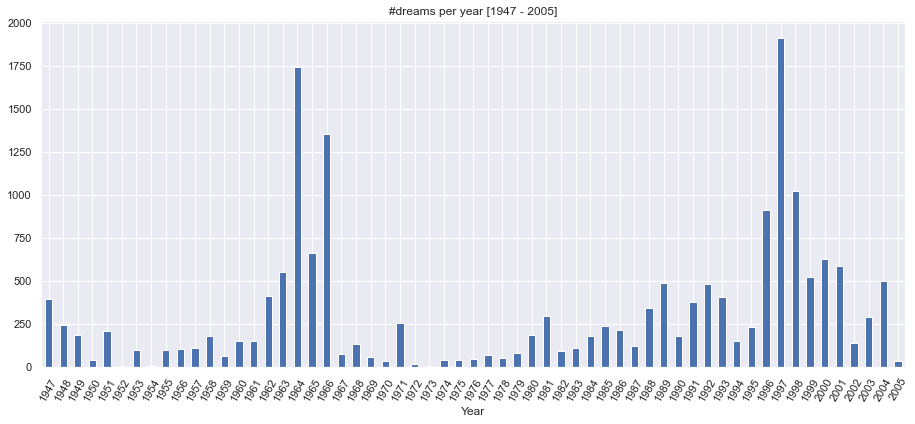

In [37]:
# 1947 - 2005
total_years[14:-14].plot(kind='bar')
plt.title("#dreams per year [1947 - 2005]")
plt.xlabel("Year")
plt.xticks(rotation=60)
plt.subplots_adjust(left=0, bottom=-0.2, right=2, top=1, wspace=0, hspace=0)
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


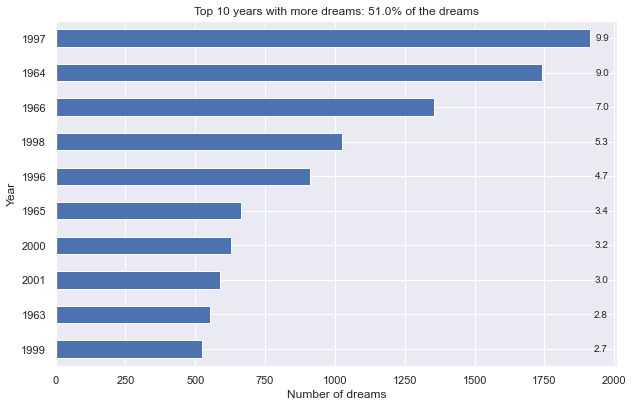

In [38]:
# top number of records/dreams per year

# number of records
n = 10

top_records = total_years.iloc[total_years.nonzero()].sort_values(ascending=True).tail(n)

top_records_index = total_years.iloc[total_years.nonzero()].sort_values().index
pos = np.arange(len(top_records))
pos_2 = round(top_records/len(dreams_df['dream'])*100, 1)

# add the percentages to the side of each bar
for p, cidx, tr in zip(pos, top_records_index, pos_2):
    plt.annotate(tr, xy=(tr+1925, p), va='center')

# plot
top_records.plot(kind='barh')

t = round(np.sum(top_records/len(dreams_df['dream'])*100))   
plt.title("Top {} years with more dreams: {}% of the dreams".format(n, t))
plt.xlabel("Number of dreams")
plt.ylabel("Year")
plt.subplots_adjust(left=0, bottom=-0.2, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

In [39]:
# add dream_year column

list_1 = range(1933, 2020)
list_2 = ['%02d' % t for t in np.arange(0, 100)]

def recode_dream_year(line): 
    if type(line) == float:
        return np.nan
    for i in list_1:
        if str(i) in line:
            return i
    for j in list_2:
        if line.endswith('/{}'.format(j)) | line.endswith('/{}?'.format(j)):
            if j in list_2[0:20]:
                return '20'+j
            else:
                return '19'+j
    else:
        return np.nan

dreams_df['dream_year'] = dreams_df['dream_date'].apply(recode_dream_year)

# rearrange the column
cols = dreams_df.columns
cols = cols[:-3].tolist() + ['dream_year', 'dream', 'dream_table']
dreams_df = dreams_df[cols]

# convert to int
dreams_df['dream_year'] = dreams_df['dream_year'].astype(int, errors='ignore')

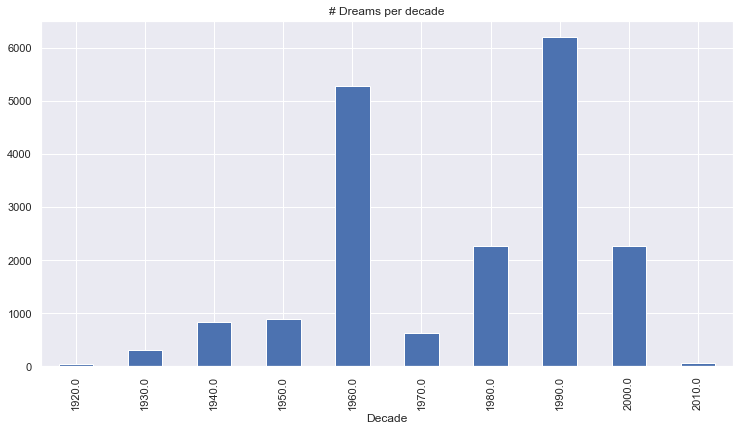

In [40]:
# plot the decades

# plot
dreams_df.groupby(dreams_df.dream_year.astype(float, errors='ignore') // 10 * 10).size().plot(kind='bar', grid=True)

plt.title("# Dreams per decade")
plt.xlabel("Decade")
# plt.xticks(range(1920, 2020, 10))
plt.subplots_adjust(left=0, bottom=-0.2, right=1.6, top=1, wspace=0, hspace=0)
plt.show()

### 2.1.4) Text descriptive statistics

<>:13: DeprecationWarning: invalid escape sequence \w
<>:13: DeprecationWarning: invalid escape sequence \w
<>:13: DeprecationWarning: invalid escape sequence \w
<ipython-input-41-1e56983eba2f>:13: DeprecationWarning: invalid escape sequence \w
  length_dream.append(len(regexp_tokenize(i, '\w+')))


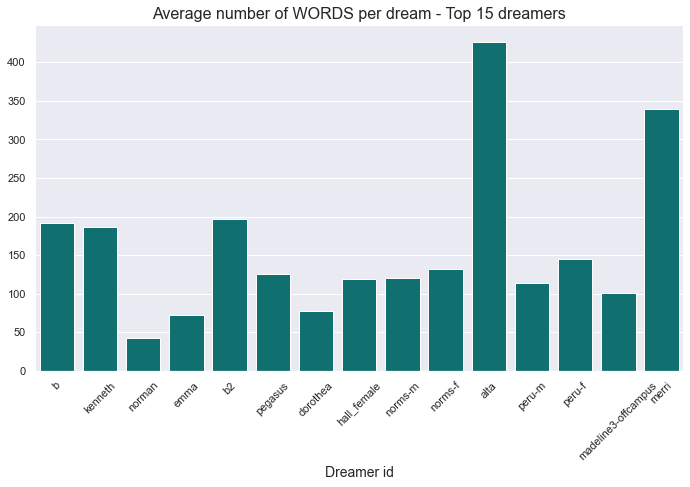

In [41]:
# Average number of words per dream - Top dreamers

n = 15

top_dreamers = dreams_df['id'].value_counts(ascending=False).head(n).index

from nltk.tokenize import regexp_tokenize

# function for the average number of words in a dream of a dreamer
def avg_words_dream(id):
    length_dream = []
    for i in dreams_df[dreams_df['id'] == id].dream:
        length_dream.append(len(regexp_tokenize(i, '\w+')))
    return round(np.mean(length_dream)).astype(np.int)

#plot
sns.barplot(top_dreamers, [avg_words_dream(i) for i in top_dreamers], color='teal')
plt.title("Average number of WORDS per dream - Top {} dreamers".format(n), fontsize=16)
plt.xlabel("Dreamer id", fontsize=14)
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

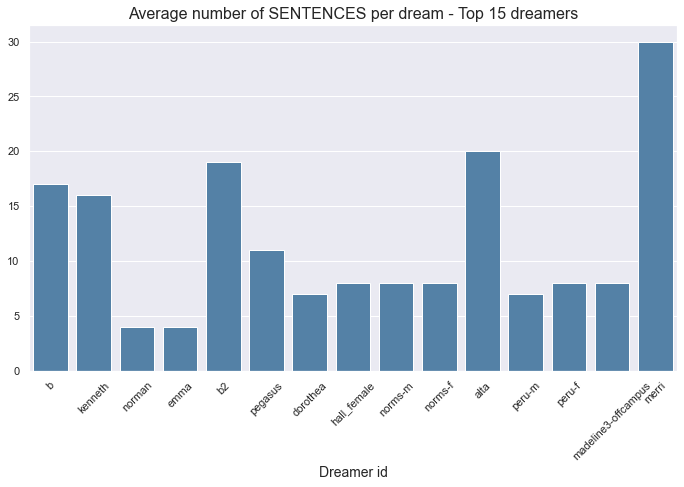

In [42]:
# Average number of sentences per dream - Top dreamers

n = 15

top_dreamers = dreams_df['id'].value_counts(ascending=False).head(n).index

from nltk.tokenize import sent_tokenize

# function for the average number of words in a dream of a dreamer
def avg_sentences_dream(id):
    length_dream = []
    for i in dreams_df[dreams_df['id'] == id].dream:
        length_dream.append(len(sent_tokenize(i)))
    return round(np.mean(length_dream)).astype(np.int)

#plot
sns.barplot(top_dreamers, [avg_sentences_dream(i) for i in top_dreamers], color='steelblue')
plt.title("Average number of SENTENCES per dream - Top {} dreamers".format(n), fontsize=16)
plt.xlabel("Dreamer id", fontsize=14)
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

In [43]:
%%script false
# Most used words
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# words in each dream
j = [regexp_tokenize(i, '\w+') for i in dreams_df.dream]

# all the words in all the dreams 
all_words = [x for i in j for x in i]

# convert to lower case and exclude stopwords
all_words = [i.lower() for i in all_words]
all_words = [i for i in all_words if i not in stopwords.words('english')]

# Count the occurence of words in all dreams
counter = Counter(all_words)

n = 30

# n most common words
most_common = counter.most_common(n)
print("{} most common words used:\n {}".format(n, most_common), "\n")

# 30 most common words used:
#  [('one', 12687), ('like', 11640), ('go', 11546), ('br', 11353), ('see', 11242), ('get', 10913), ('back', 8875), 
# ('room', 7358), ('man', 7332), ('going', 7298), ('people', 6676), ('house', 6474), ('said', 6093), ('around', 5876), 
# ('something', 5835), ('say', 5421), ('know', 5360), ('went', 5342), ('dream', 5315), ('would', 5165), ('woman', 4858),
# ('think', 4827), ('says', 4663), ('got', 4632), ('us', 4626), ('two', 4591), ('time', 4543), ('car', 4483), 
# ('look', 4378), ('could', 4050)]

Couldn't find program: 'false'


#### Insert Number of words & Number of sentences column

In [44]:
%%time
# nltk
from nltk.tokenize import regexp_tokenize, sent_tokenize, word_tokenize
import re

# create variables
dreams_df['nr_words'] = dreams_df['dream'].apply(lambda x: len(re.findall(r'\w+', x)))

# sentences acabei por não fazer porque alguns sonhos têm traços, ponto e vírgula, e fica difícil ser preciso
# dreams_df['nr_sentences'] = dreams_df['dream'].apply(lambda x: len(sent_tokenize(x)))  

# see head
dreams_df.head(2)

Wall time: 1.49 s


,id,name,type,sex,age,time,dream_number,dream_date,dream_year,dream,dream_table,nr_words
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,1957,"The one at the Meads's house, where it's bigge...",NaN,174
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,1985,"I am in some public place, reminds me of the g...",NaN,73


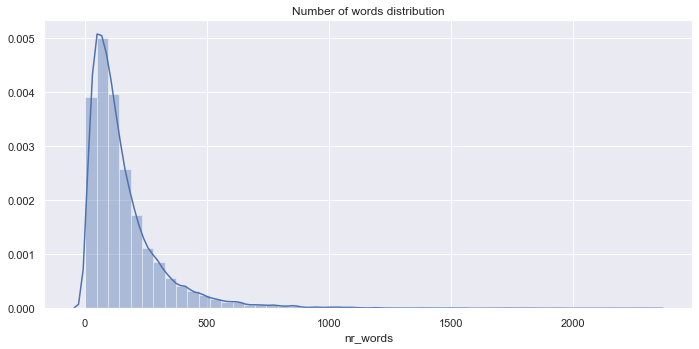

In [45]:
# distribution of the number of words
sns.distplot(dreams_df['nr_words'])
plt.title('Number of words distribution')

plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

#### Insert text properties: Number of exclamation points (sentiment analysis)

In [46]:
%%time
# A text with many punctuation signs could signal a very emotionally charged dream

# function to count pattern (in this first case, exclamation points)
def count_pattern(pattern, text):
    return len(re.findall(r"[{}]".format(pattern), text))

dreams_df['nr_exclamations'] = dreams_df['dream'].apply(lambda x: count_pattern('!', x))

Wall time: 102 ms


#### Languages

In [47]:
%%script false # takes too much time
from langdetect import detect_langs

dreams_df['lang'] = dreams_df['dream'].apply(lambda x: str(detect_langs(x)).split(':')[0][1:])

print(dreams_df['lang'].value_counts())

# ---------> All in english

Couldn't find program: 'false'


### 2.1.5) Readability tests

In [48]:
from textatistic import Textatistic

# manually compute the Flesch score
dream_example = dreams_df['dream'][1]

print(dream_example, "\n")

# using nltk
print("score nltk:", 206.835 - 1.015*(len(re.findall(r'\w+', dream_example))/len(sent_tokenize(dream_example))) - \
84.6*(Textatistic(dream_example).dict()['sybl_count']/len(re.findall(r'\w+', dream_example))))

# using Textatistic
print("score Textatistic:", 206.835 - 1.015*(Textatistic(dream_example).dict()['word_count']/ \
                                             Textatistic(dream_example).dict()['sent_count']) - \
         84.6*(Textatistic(dream_example).dict()['sybl_count']/Textatistic(dream_example).dict()['word_count']))

# differences
print("\nTotal words: nltk {}, Textatistic {}".format(len(re.findall(r'\w+', dream_example)), 
                                                     Textatistic(dream_example).dict()['word_count']))

print("Total sentences: nltk {}, Textatistic {}".format(len(sent_tokenize(dream_example)), 
                                                          Textatistic(dream_example).dict()['sent_count']))

print("Total syllables Textatistic: {}".format(Textatistic(dream_example).dict()['sybl_count']))

I am in some public place, reminds me of the grocery store in another dream, or lots of airports - there is food involved, and for some reason or other people are eating in the restroom. (This isn't normal.) I'm sitting at the mirror-counter next to a man, and am very ill at ease about it. There's no actual reason for it, it's entirely the principle of the thing. 

score nltk: 87.48659246575342
score Textatistic: 82.65668478260872

Total words: nltk 73, Textatistic 69
Total sentences: nltk 4, Textatistic 4
Total syllables Textatistic: 87


- **Flesch reading ease**: https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
- **Gunning fog index**: https://en.wikipedia.org/wiki/Gunning_fog_index
- **Dale-Chall score**: https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula

In [49]:
%%time

from textatistic import Textatistic

# Readability types
readabilities = ['flesch_score', 'gunningfog_score', 'dalechall_score']

for i in readabilities:
    # define readability score
    def read_score(text, metric=i):
        try:
            score = Textatistic(text).scores[metric]
        except:
            score = np.nan
        return score
    # create column
    dreams_df[i] = dreams_df['dream'].apply(read_score)


Wall time: 16min 54s


In [50]:
dreams_df.head(3)

,id,name,type,sex,age,time,dream_number,dream_date,dream_year,dream,dream_table,nr_words,nr_exclamations,flesch_score,gunningfog_score,dalechall_score
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,1957,"The one at the Meads's house, where it's bigge...",NaN,174,0,89.080227,7.327273,5.890355
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,1985,"I am in some public place, reminds me of the g...",NaN,73,0,82.656685,7.479710,6.322825
2,alta,Alta: a detailed dreamer,series,F,A,1985-1997,100,5/30/86,1986,"I'm driving a car somewhere, because it's sout...",NaN,241,0,81.282474,10.348070,6.637248


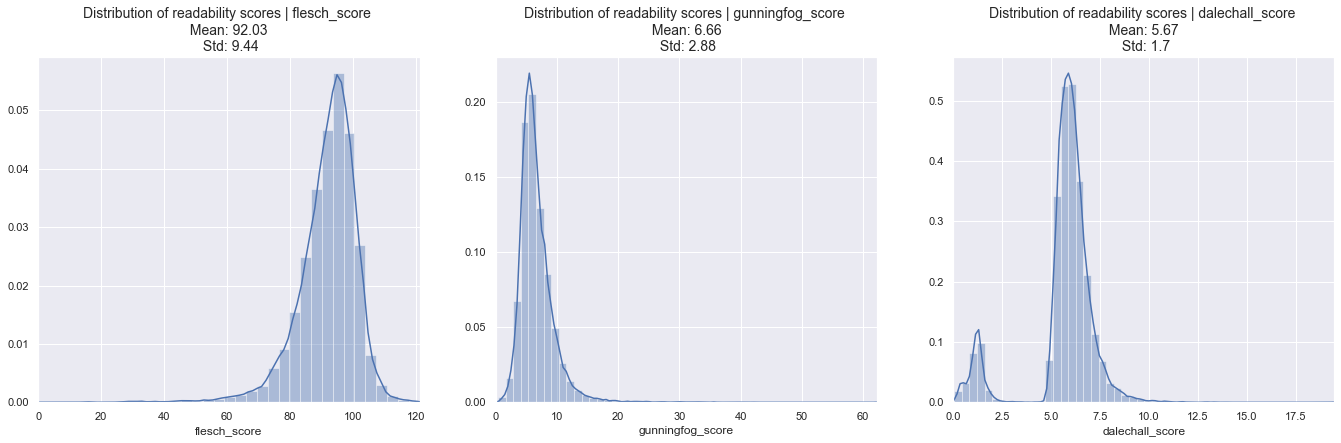

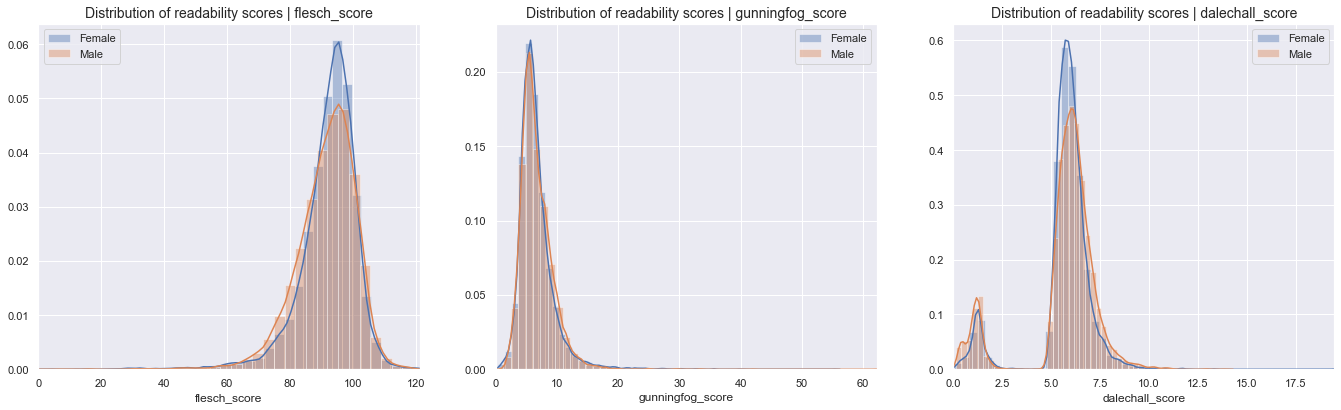

In [51]:
import inspect

# All dreamers

# Readability types
readabilities = ['flesch_score', 'gunningfog_score', 'dalechall_score']

# distribution plots
for j, i in enumerate(readabilities):
    # distribution plots
    plt.subplot(1, 3, j + 1)
    sns.distplot(dreams_df[dreams_df[i].notnull()][i])
    plt.title("""Distribution of readability scores | {} \n Mean: {} \n Std: {}""".format(i, 
                                                                                          round(np.mean(dreams_df[i]), 2),
                                                                                          round(np.std(dreams_df[i]), 2)),
              fontsize=14)
    plt.xlim(0, np.max(dreams_df[i]))
    
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0.2, hspace=0)
plt.show()

###############################################################################################

# distribution plots - Male & Female 
for j, i in enumerate(readabilities):
    # distribution plots
    plt.subplot(1, 3, j + 1)
    sns.distplot(dreams_df[(dreams_df[i].notnull()) & (dreams_df['sex'] == 'F')][i])
    sns.distplot(dreams_df[(dreams_df[i].notnull()) & (dreams_df['sex'] == 'M')][i])
    plt.title("""Distribution of readability scores | {}""".format(i), fontsize=14)
    plt.xlim(0, np.max(dreams_df[i]))
    plt.legend(['Female', 'Male'])
    
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0.2, hspace=0)
plt.show()

In [52]:
print("""The Flesch score does not have a theoretical lower bound; therefore, it is possible to make the score as low as 
wanted by arbitrarily including words with many syllables.""")
dreams_df[dreams_df['flesch_score'] <= 0]

The Flesch score does not have a theoretical lower bound; therefore, it is possible to make the score as low as 
wanted by arbitrarily including words with many syllables.


,id,name,type,sex,age,time,dream_number,dream_date,dream_year,dream,dream_table,nr_words,nr_exclamations,flesch_score,gunningfog_score,dalechall_score
5695,blind-f,Blind dreamers (F),set,F,A,mid-1990s,111-27,5/16/97,1997,I was on the telephone with a person named T w...,NaN,139,0,-32.600588,55.282353,11.543129
5851,blind-m,Blind dreamers (M),set,M,A,mid-1990s,104-04,5/19/97,1997,"I dreamed I was in a room, I think it was a li...",NaN,153,0,-51.143624,62.284564,12.934417


In [53]:
# ?? supostamente complexas
print(dreams_df[dreams_df['flesch_score'] <= 10].flesch_score, "\n")

print(dreams_df['dream'][5888])
#################################
print("\n--> Possível motivo para quase todos: sonhos sem pontuação, com uma frase só")
print("""\n--> Not this metric, since the greater the average sentence length the harder it is to read, supposedly""")

5695    -32.600588
5851    -51.143624
5888      6.913462
17922     4.188387
Name: flesch_score, dtype: float64 

We were on a trip somewhere, had been down south and were on our way back and somehow we stopped at a rest area and I ended up talking to somebody on the phone for a long time that we had met earlier on our trip in another state I think, it might have been Ohio, I don't know what state we were in at this rest stop but I remember thinking that I had to get off the phone and use the bathroom and get a Coke so I told the person I had to go and would talk to him another time.

--> Possível motivo para quase todos: sonhos sem pontuação, com uma frase só

--> Not this metric, since the greater the average sentence length the harder it is to read, supposedly


### 2.1.6) POS tagging and NER (spaCy)

### 2.1.7) Sentiment Analysis

#### TextBlob

In [54]:
%%time
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer

# Polarity and subjectivity
def text_blob(text, analyzer=PatternAnalyzer()):
    try:
        text_blob = TextBlob(text, analyzer=analyzer).sentiment
    except:
        text_blob = np.nan
    return text_blob

# create variables
dreams_df['polarity'] = dreams_df['dream'].apply(lambda x: round(text_blob(x)[0], 2))
dreams_df['subjectivity'] = dreams_df['dream'].apply(lambda x: round(text_blob(x)[1], 2))

# see head
dreams_df.head(2)

Wall time: 58.8 s


,id,name,type,sex,age,time,dream_number,dream_date,dream_year,dream,dream_table,nr_words,nr_exclamations,flesch_score,gunningfog_score,dalechall_score,polarity,subjectivity
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,1957,"The one at the Meads's house, where it's bigge...",NaN,174,0,89.080227,7.327273,5.890355,-0.01,0.29
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,1985,"I am in some public place, reminds me of the g...",NaN,73,0,82.656685,7.479710,6.322825,-0.09,0.40


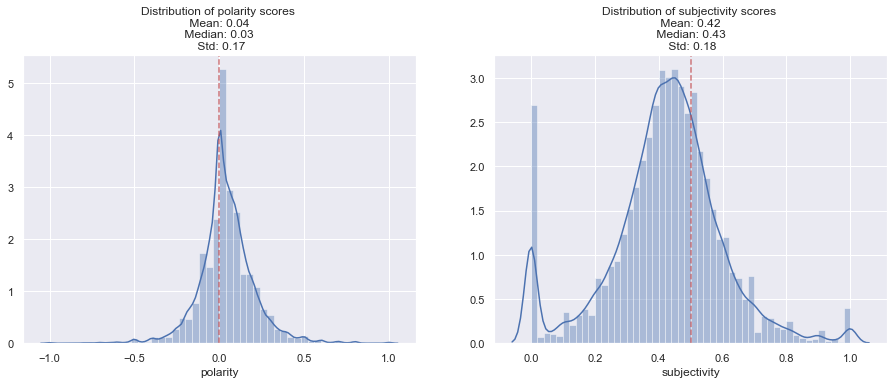

polarity is a float within the range [-1, 1] where -1 is very negative, 0 is neutral, and +1 is very positive.
subjectivity is a float within the range [0, 1] where 0 is very objective and 1 is very subjective.


In [55]:
# All dreamers

# polarity distribution
plt.subplot(1, 2, 1)
sns.distplot(dreams_df['polarity'])
plt.axvline(x=0, color='r', alpha=0.75, linestyle='--')
plt.title("""Distribution of polarity scores \n Mean: {} \n Median: {} \n Std: {}""".format(
    round(np.mean(dreams_df['polarity']), 2), round(np.median(dreams_df['polarity']), 2), 
    round(np.std(dreams_df['polarity']), 2)))

# subjectivity scores
plt.subplot(1, 2, 2)
sns.distplot(dreams_df['subjectivity'])
plt.axvline(x=0.5, color='r', alpha=0.75, linestyle='--')
plt.title("""Distribution of subjectivity scores \n Mean: {} \n Median: {} \n Std: {}""".format(
    round(np.mean(dreams_df['subjectivity']), 2), round(np.median(dreams_df['subjectivity']), 2),
    round(np.std(dreams_df['subjectivity']), 2)))
    
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

print("""polarity is a float within the range [-1, 1] where -1 is very negative, 0 is neutral, and +1 is very positive.
subjectivity is a float within the range [0, 1] where 0 is very objective and 1 is very subjective.""")

Examples of very positive, neutral and very negative dreams

In [56]:
# examples of a very positive, neutral and very negative dreams:
print("""Very positive:\n{}\n""".format(dreams_df[dreams_df['polarity'] == 1]['dream'].iloc[0]))
print("""Neutral:\n{}\n""".format(dreams_df[dreams_df['polarity'] == 0]['dream'].iloc[0]))
print("""Very negative:\n{}""".format(dreams_df[dreams_df['polarity'] == -1]['dream'].iloc[0]))

Very positive:
A woman is there and I'm impressed that I know her. After all, she's from LA music/concert scene. I tell people I spoke to her. It impresses them.

Neutral:
With John Boats and a couple of friends outside near maybe a farmhouse, with trees and sunshine - talking about (something nostalgic?) - a huge machine starts operating - it's for construction of something, like a highway - but it's not supposed to be going now and it's going to smash us all - we run - people scatter - I'm going to try to reach the car.

Very negative:
I woke up with an oppressed feeling, like I had tried to work out something horrible but can't remember it.


Examples of very objective and very subjective dreams

In [57]:
# examples of a very objective and very subjective dreams:
print("""Very objective:\n{}\n""".format(dreams_df[dreams_df['subjectivity'] == 0]['dream'].iloc[0]))
print("""Very subjective:\n{}""".format(dreams_df[dreams_df['subjectivity'] == 1]['dream'].iloc[0]))

Very objective:
I was on a softball field exercising and just as something embarrassing was about to happen to me, the scene switched and I was being taught techniques in martial arts.

Very subjective:
Funny dreams.


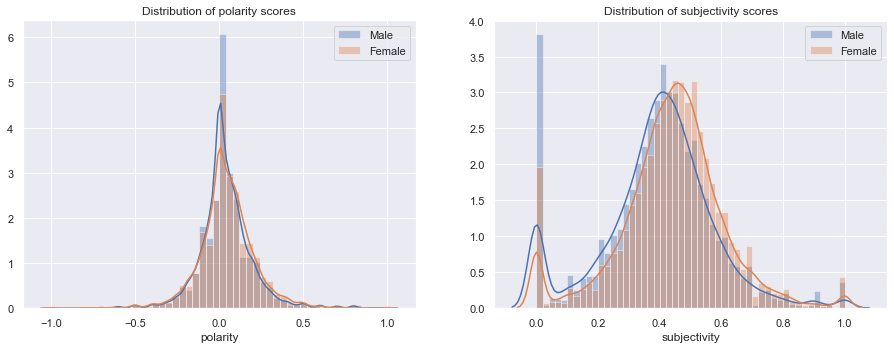

In [58]:
# polarity distribution
plt.subplot(1, 2, 1)
sns.distplot(dreams_df[dreams_df['sex'] == 'M']['polarity'])
sns.distplot(dreams_df[dreams_df['sex'] == 'F']['polarity'])
# plt.axvline(x=0, color='orange', alpha=0.5, linestyle='--')
plt.title("""Distribution of polarity scores""")
plt.legend(['Male', 'Female'])

# subjectivity scores
plt.subplot(1, 2, 2)
sns.distplot(dreams_df[dreams_df['sex'] == 'M']['subjectivity'])
sns.distplot(dreams_df[dreams_df['sex'] == 'F']['subjectivity'])
# plt.axvline(x=0.5, color='orange', alpha=0.5, linestyle='--')
plt.title("""Distribution of subjectivity scores""")
plt.legend(['Male', 'Female'])
    
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

This difference between male and female subjectivity is mainly due to the dreamer Barb Sanders, as we will see below on the individual case.

Top dreamers

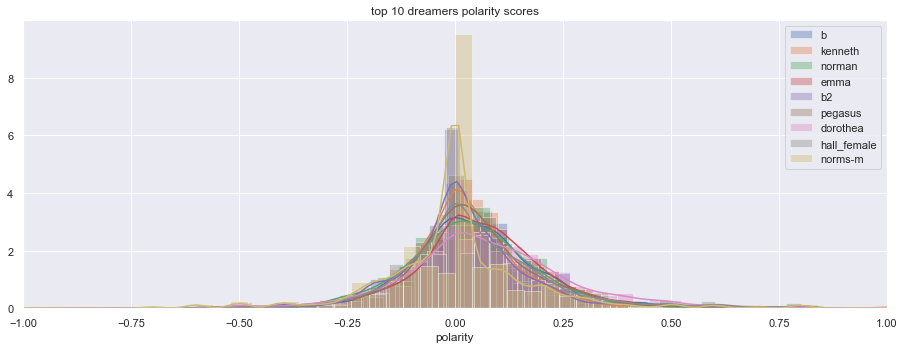

In [59]:
# by the way... top dreamers individually

# top n dreamers
n = 10
top_d = dreams_df['id'].value_counts(ascending=False).head(n).index
top_df = dreams_df.copy()
top_df = top_df[top_df['id'].isin(top_d)]
top_df["id"] = top_df["id"].map(lambda x: x.replace("b2", "b")) # replace b2 with b (Barb Sanders)

# polarity distribution
for i in set(top_df.id):
    sns.distplot(top_df[top_df['id'] == i]['polarity'])
plt.legend(top_d)
plt.xlim([-1, 1])
plt.title('top {} dreamers polarity scores'.format(n))

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

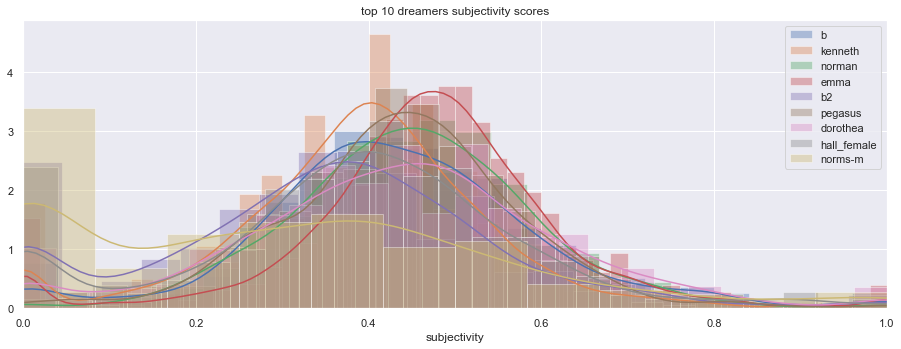

In [60]:
# subjectivity distribution
for i in set(top_df.id):
    sns.distplot(top_df[top_df['id'] == i]['subjectivity'])
plt.legend(top_d)
plt.xlim([0, 1])
plt.title('top {} dreamers subjectivity scores'.format(n))

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

The textblob.sentiments module contains two sentiment analysis implementations, **PatternAnalyzer** (based on the **pattern library**) and **NaiveBayesAnalyzer** (an NLTK classifier trained on a **movie reviews** corpus).

The default implementation is PatternAnalyzer, but we can override the analyzer by passing another implementation into a TextBlob’s constructor.

In [61]:
# vi alguns exemplos com o NaiveBayesAnalyzer mas não era muito bom... para além disso ia demorar décadas a correr - 
# só para um exemplo demorava uns 5-10 segundos
print(5*len(dreams_df)/60/60)

26.9875


#### VADER 

VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in **social media**, and works well on texts from other domains.

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [62]:
%%time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Polarity and subjectivity
def vader_sent(text, output='compound'):
    try:
        vader = SentimentIntensityAnalyzer().polarity_scores(text)[output]
    except:
        vader = np.nan
    return vader

# create variables
dreams_df['vader_compound'] = dreams_df['dream'].apply(lambda x: round(vader_sent(x, output='compound'), 2))
dreams_df.head(2)

Wall time: 6min 45s


,id,name,type,sex,age,time,dream_number,dream_date,dream_year,dream,dream_table,nr_words,nr_exclamations,flesch_score,gunningfog_score,dalechall_score,polarity,subjectivity,vader_compound
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,1957,"The one at the Meads's house, where it's bigge...",NaN,174,0,89.080227,7.327273,5.890355,-0.01,0.29,0.65
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,1985,"I am in some public place, reminds me of the g...",NaN,73,0,82.656685,7.479710,6.322825,-0.09,0.40,-0.14


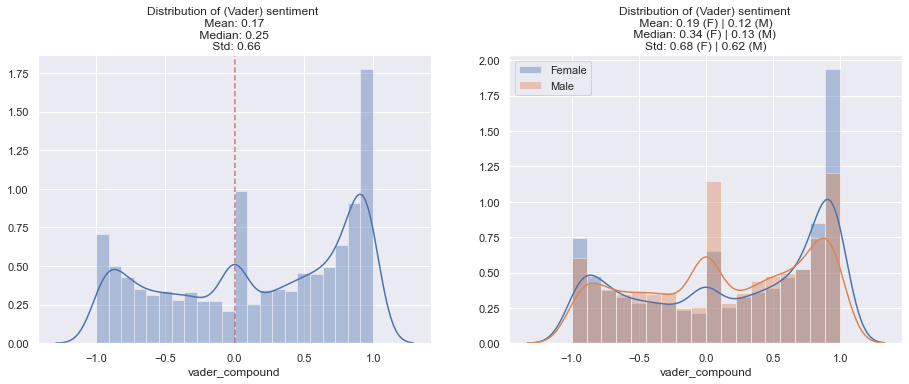

In [63]:
# All dreamers

# VADER Sentiment Analysis
plt.subplot(1, 2, 1)
sns.distplot(dreams_df['vader_compound'])
plt.axvline(x=0, color='r', alpha=0.75, linestyle='--')
plt.title("""Distribution of (Vader) sentiment \n Mean: {} \n Median: {} \n Std: {}""".format(
    round(np.mean(dreams_df['vader_compound']), 2), round(np.median(dreams_df['vader_compound']), 2), 
    round(np.std(dreams_df['vader_compound']), 2)))

# VADER Sentiment Analysis - Female & Male
plt.subplot(1, 2, 2)
vader_female = dreams_df[dreams_df['sex'] == 'F']
vader_male = dreams_df[dreams_df['sex'] == 'M']
sns.distplot(vader_female['vader_compound'])
sns.distplot(vader_male['vader_compound'])
plt.title("""Distribution of (Vader) sentiment \n Mean: {} (F) | {} (M) \n Median: {} (F) | {} (M)  
Std: {} (F) | {} (M)""".format(
    round(np.mean(vader_female['vader_compound']), 2), round(np.mean(vader_male['vader_compound']), 2), 
    round(np.median(vader_female['vader_compound']), 2), round(np.median(vader_male['vader_compound']), 2), 
    round(np.std(vader_female['vader_compound']), 2), round(np.std(vader_male['vader_compound']), 2)))
plt.legend(['Female', 'Male'])
    
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

Examples of very positive, neutral and very negative dreams:

In [64]:
# examples of a very positive, neutral and very negative dreams:
print("""Very positive:\n{}\n""".format(dreams_df[dreams_df['vader_compound'] == 1]['dream'].iloc[1]))
print("""Neutral:\n{}\n""".format(dreams_df[dreams_df['vader_compound'] == 0]['dream'].iloc[0]))
print("""Very negative:\n{}""".format(dreams_df[dreams_df['vader_compound'] == -1]['dream'].iloc[0]))

Very positive:
It's daytime, Sunday morning about nine, and I'm driving down the street on my way to breakfast and laundry. There's construction just after I turn on to the street, and a black man, fairly thin, wearing a workshirt, short hair, grouchy face, jeans, is standing in the right-hand lane in just the position where I have to edge around him into the traffic, which is heavy and a little dodgy because of the construction stuff. He could move easier than I can get around him, but he just stands there with his arms crossed in front of him, looking sullen, like "Dare me - go on, hit me". I do get around him, and still have to keep slow because this man and woman are dashing across the street, not at the crosswalk, but in a very awkward place and everybody has to stop or dodge them. Honestly. I pass a restaurant in the middle of the road, a small place, roundish, lots of glass so the customers can look outside. As I pass I see Bonnie in there, her family just being seated. I think 

Top dreamers

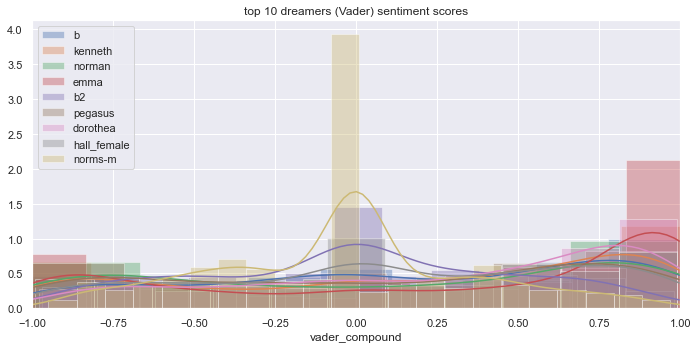

In [65]:
# top n dreamers
n = 10
top_d = dreams_df['id'].value_counts(ascending=False).head(n).index
top_df = dreams_df.copy()
top_df = top_df[top_df['id'].isin(top_d)]
top_df["id"] = top_df["id"].map(lambda x: x.replace("b2", "b")) # replace b2 with b (Barb Sanders)

# for the top dreamers defined above
for i in set(top_df.id):
    sns.distplot(top_df[top_df['id'] == i]['vader_compound'])
plt.legend(top_d)
plt.xlim([-1, 1])
plt.title('top {} dreamers (Vader) sentiment scores'.format(n))

plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0.2, hspace=0)
plt.show()

#### Exclamations

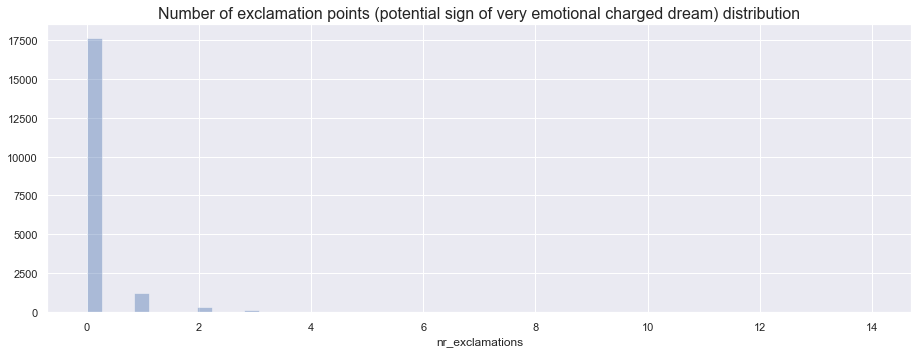

In [66]:
# distribution
sns.distplot(dreams_df['nr_exclamations'], kde=False)

plt.title('Number of exclamation points (potential sign of very emotional charged dream) distribution', fontsize=16)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

### 2.1.8) Correlational Analysis

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


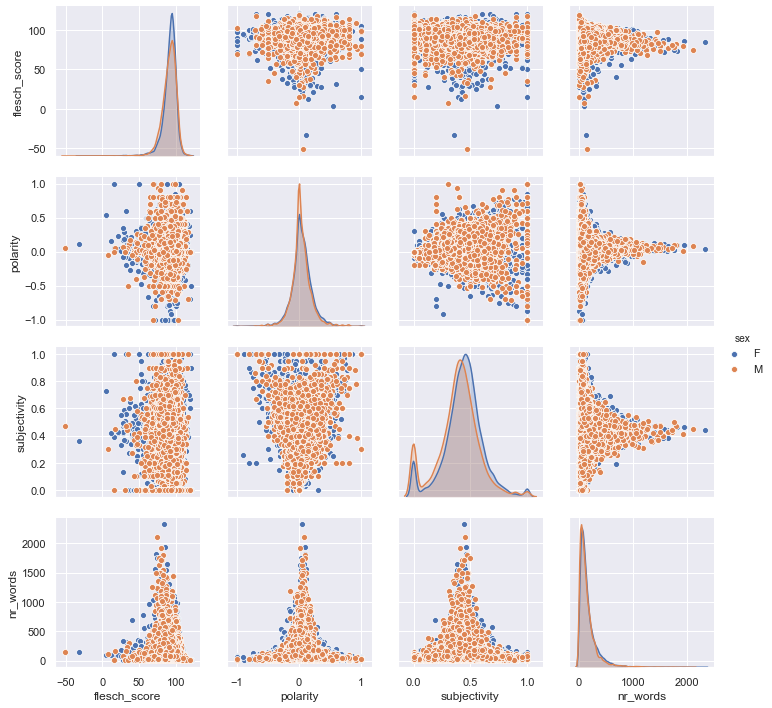

In [67]:
# columns for correlational analysis
columns = ['flesch_score', 'polarity', 'subjectivity', 'nr_words']

# pairplot
sns.pairplot(data=dreams_df, vars=columns, hue='sex')  #
plt.show()

### 2.1.9) TF-IDF and similarity scores

In [68]:
# Bag-of-Words model
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer_all = CountVectorizer()

# Generate matrix of word vectors
bow_matrix_all = vectorizer_all.fit_transform(dreams_df.dream)

# Print the shape of bow_matrix
print(bow_matrix_all.shape)

(19431, 35380)


#### Cosine similarity (based on a TfidfVectorizer)

In [69]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer_all = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix_all = vectorizer_all.fit_transform(dreams_df['dream']) # corpus  

# Print the shape of tfidf_matrix
print(tfidf_matrix_all.shape)

(19431, 35380)


In [70]:
%%time
# Cosine similarity matrix of a corpus
from sklearn.metrics.pairwise import cosine_similarity

# Compute and print the cosine similarity matrix
cosine_sim_all = cosine_similarity(tfidf_matrix_all, tfidf_matrix_all)
print(len(cosine_sim_all))
print(cosine_sim_all)

19431
[[1.         0.10406304 0.15708327 ... 0.09259701 0.09130041 0.0521268 ]
 [0.10406304 1.         0.16717017 ... 0.10748296 0.10056902 0.04605423]
 [0.15708327 0.16717017 1.         ... 0.12117214 0.11917354 0.05946793]
 ...
 [0.09259701 0.10748296 0.12117214 ... 1.         0.23140371 0.10121032]
 [0.09130041 0.10056902 0.11917354 ... 0.23140371 1.         0.10811449]
 [0.0521268  0.04605423 0.05946793 ... 0.10121032 0.10811449 1.        ]]
Wall time: 2min 13s


In [71]:
%%time
# Most similar dreams
similar_df_all = pd.DataFrame(cosine_sim_all)
most_similar_df_all = pd.DataFrame(columns=['most_similar', 'cosine_value'])

for i in range(len(similar_df_all)): 
    # i: columns. We want the 2nd largest
    most_similar_df_all.loc[i] = [similar_df_all[i].sort_values(ascending=False).index[1], 
                                  similar_df_all[i].sort_values(ascending=False).reset_index(drop=True)[1]]

# the index is the dream number
most_similar_df_all.head()

Wall time: 4min 34s


,most_similar,cosine_value
0,13661.0,0.290126
1,13577.0,0.275177
2,153.0,0.455114
3,144.0,0.464013
4,238.0,0.316547


In [72]:
# sort by cosine values
print(most_similar_df_all.sort_values('cosine_value', ascending=False).head(8), 
"""\nwe see that there are not always 2 repetitions on the cosine_value column and that there are 2 equal dreams
(other than the dream itself).\n""")

# There are no equal cosine values [when we don't count with the other side of the diagonal matrix (a with b | b with a)]
print(most_similar_df_all['cosine_value'].value_counts().head())
print("we can drop duplicates.")

       most_similar  cosine_value
15861        8916.0      1.000000
8916         8916.0      1.000000
15864        8896.0      1.000000
8896         8896.0      1.000000
14254       14631.0      1.000000
14631       14631.0      1.000000
8897        15865.0      0.997449
15865        8897.0      0.997449 
we see that there are not always 2 repetitions on the cosine_value column and that there are 2 equal dreams
(other than the dream itself).

1.000000    4
0.506629    2
0.393014    2
0.349011    2
0.420827    2
Name: cosine_value, dtype: int64
we can drop duplicates.


In [73]:
# Most similar dreams

# the n most similar dreams we want
cs_n = 3

# most_similar_df sorted by cs value and removing duplicates(we can do it as we've seen above); 
# removing value 1 & 0.996562 & 0.991304 & 0.946384 (same dreams)
sort_by_cosine_all = most_similar_df_all.sort_values('cosine_value', ascending=False).drop_duplicates(
    subset='cosine_value').iloc[4:]

print("""The {} highest Cosine Similarity value is {}, between the dreams number {} and {}.\n""".format(
    cs_n,
    sort_by_cosine_all.iloc[cs_n - 1].cosine_value,
    sort_by_cosine_all.iloc[cs_n - 1].most_similar,
    sort_by_cosine_all.index[cs_n - 1]))

# dream 
print("""Dream number {} | Dreamer: {} | Date: {}: \n {}\n""".format(
    sort_by_cosine_all.iloc[cs_n - 1].most_similar,
    dreams_df.reset_index(drop=True).iloc[int(sort_by_cosine_all.iloc[cs_n - 1].most_similar)]['id'],
    dreams_df['dream_date'].reset_index(drop=True)[sort_by_cosine_all.iloc[cs_n - 1].most_similar],
    dreams_df['dream'].reset_index(drop=True)[sort_by_cosine_all.iloc[cs_n - 1].most_similar]))

# dream 
print("""Dream number {} | Dreamer: {} | Date: {}: \n {}\n""".format(
    sort_by_cosine_all.index[cs_n - 1],
    dreams_df.reset_index(drop=True).iloc[int(sort_by_cosine_all.index[cs_n - 1])]['id'],
    dreams_df['dream_date'].reset_index(drop=True)[sort_by_cosine_all.index[cs_n - 1]],
    dreams_df['dream'].reset_index(drop=True)[sort_by_cosine_all.index[cs_n - 1]]))

The 3 highest Cosine Similarity value is 0.9911182645208513, between the dreams number 1850.0 and 1849.

Dream number 1850.0 | Dreamer: b | Date: 12/26/88: 
 [Same as the previous dream.] It's time to take our baggage to the airport and catch our plane. We are late and the baggage man is annoyed. Then we do it a second time. We get to the baggage counter at 10:10. That's the time the plane leaves. I say, "I know I'm late, but you can do it, right?" He sighs and does so. Then I realize I can't get on the plane. So I go back to get my baggage. We decide to drive. Then I lose everybody and realize they drove away without me and I have to walk. So I walk for miles. When I get there, one of the four people isn't there and I realize I didn't have to walk after all, because she had the van. I just missed her. Then we have three drivers and two vans and we try to figure out how we are going to drive so far that way. Someone's going to be tired.

Dream number 1849 | Dreamer: b | Date: 12/26/88:

**===================================================================================================================**

## 2.2) Individual dreamer
<a id="individual_dreamer"></a>

## <font color='darkgreen'>Individual best case: Barb Sanders</font>

In [74]:
dreamer = 'Barb Sanders'
dreamer2 = 'Barb Sanders #2'

# Barb Sanders dataframe
b_df = dreams_df[(dreams_df['name'] == dreamer) | (dreams_df['name'] == dreamer2)]

### 2.2.1) Number of dreams | Text descriptive statistics

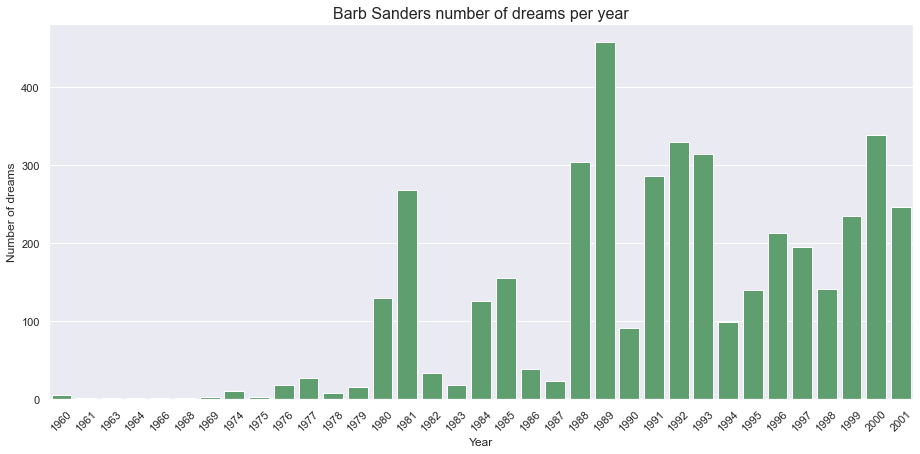

In [75]:
# number of dreams per year (recorded)
nr_dreams = b_df['dream_year'].value_counts().sort_index()

# nr dreams per year
x_0 = nr_dreams.index.astype(np.int)
x = []
y = np.arange(int(min(nr_dreams.index)), int(max(nr_dreams.index))+1)

for i in y:
    if i not in x_0:
        x.append(0)
    else:
        x.append(nr_dreams.loc[str(i)])

# annotate
# plot
sns.barplot(x=nr_dreams.index, y=nr_dreams, color='g')  
plt.title("{} number of dreams per year".format(dreamer), fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of dreams")
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.3, right=2, top=1, wspace=0, hspace=0)
plt.show()

#### Total number of dreams, Words & Sentences | descriptive statistics

In [76]:
# Total number of dreams
print("Total number of dreams: {}".format(len(b_df.dream.notnull())))

import textatistic

# Average number of words in a dream (textatistic)
def avg_words(df):
    length_dream = []
    for i in df.dream:
        length_dream.append(textatistic.word_count(i))
    return round(np.mean(length_dream)).astype(np.int)

print("Average number of words in a dream: {} (Textatistic)".format(avg_words(b_df)))

# Average number of sentences in a dream (textatistic)
def avg_sents(df):
    length_dream = []
    for i in df.dream:
        length_dream.append(textatistic.sent_count(i))
    return round(np.mean(length_dream)).astype(np.int)

print("Average number of sentences in a dream: {} (Textatistic)".format(avg_sents(b_df)))

######################################################

# nltk

# Total number of dreams
print("\nTotal number of dreams: {}".format(len(b_df.dream.notnull())))

# Average number of words in a dream (nltk)
print("Average number of words in a dream: {} (nltk)".format(round(np.mean(b_df['nr_words']))))

# Average number of sentences in a dream (nltk)
def avg_sents(df):
    length_dream = []
    for i in df.dream:
        length_dream.append(len(sent_tokenize(i)))
    return round(np.mean(length_dream)).astype(np.int)

print("Average number of sentences in a dream: {} (nltk)".format(avg_sents(b_df)))

Total number of dreams: 4254
Average number of words in a dream: 188 (Textatistic)
Average number of sentences in a dream: 18 (Textatistic)

Total number of dreams: 4254
Average number of words in a dream: 193 (nltk)
Average number of sentences in a dream: 17 (nltk)


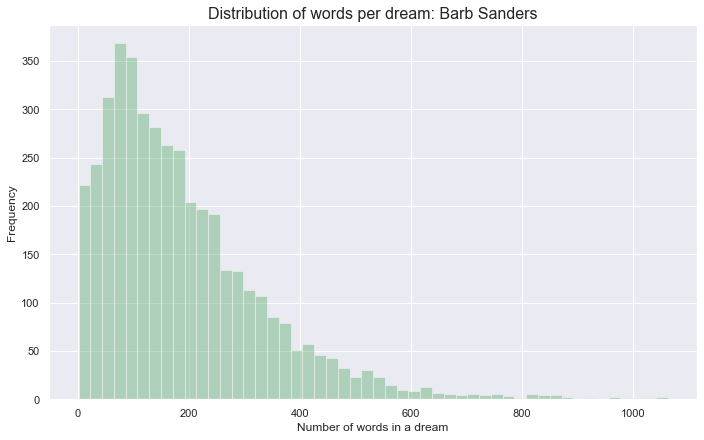

In [77]:
# number of words per dream
w_per_dream = [textatistic.word_count(i) for i in b_df.dream]

sns.distplot(w_per_dream, kde=False, color='g')
plt.title("Distribution of words per dream: {}".format(dreamer), fontsize=16)
plt.xlabel("Number of words in a dream")
plt.ylabel("Frequency")
plt.subplots_adjust(left=0, bottom=-0.3, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

### 2.2.2) Readability scores

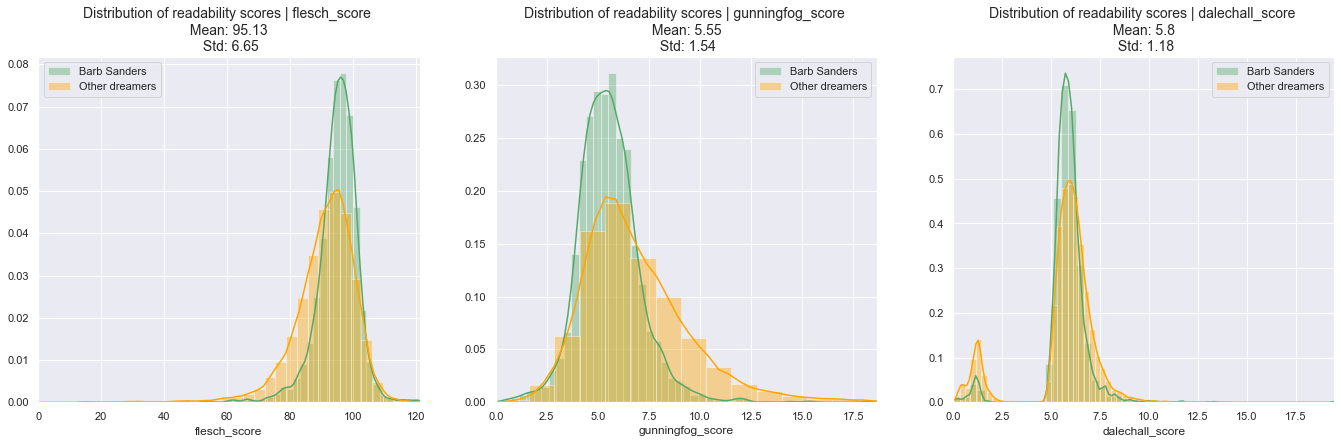

In [78]:
# Readability plot

# Readability score types
readabilities = ['flesch_score', 'gunningfog_score', 'dalechall_score']

# distribution plot
for j, i in enumerate(readabilities):
    # distribution plots
    plt.subplot(1, 3, j + 1)
    sns.distplot(b_df[b_df[i].notnull()][i], color='g')
    df_without_dreamer = dreams_df[~dreams_df.index.isin(b_df.index)]
    sns.distplot(df_without_dreamer[df_without_dreamer[i].notnull()][i], color='orange') # other dreamers
    plt.title("""Distribution of readability scores | {} \n Mean: {} \n Std: {}""".format(i, 
                                                                                          round(np.mean(b_df[i]), 2),
                                                                                          round(np.std(b_df[i]), 2)),
              fontsize=14)
    plt.legend(['Barb Sanders', 'Other dreamers'])
    plt.xlim(0, np.max(b_df[i]))
    
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0.2, hspace=0)
plt.show()

### 2.2.3) Misspellings / made-up words / Character n-grams

In [79]:
%%script false
%%time
# CountVectorizer(ngram_range=(2, 3), analyzer="char_wb").fit(b_df['dream']).get_feature_names()

# from autocorrect import Speller
# spell = Speller(lang='en')

from spellchecker import SpellChecker 
spell = SpellChecker()

all_words = set(word_tokenize(b_df['dream'].str.cat()))

misspellings = []
for i in all_words:
    if i != spell.correction(i):
        misspellings.append(i)

misspellings

Couldn't find program: 'false'


## 2.2.3) <font color='darkgreen'>**Topic identification**</font>

### **POS tagging**

#### nltk - most common words

<unknown>:7: DeprecationWarning: invalid escape sequence \w


25 most common words used by Barb Sanders ((nltk + WordNetLemmatizer + excluding stopwords)):
 
[('say', 5954), ('see', 5381), ('go', 4968), ('get', 4198), ('like', 3895), ('man', 3142), ('one', 3128), ('woman', 2806), ('look', 2773), ('room', 2635), ('back', 2604), ('come', 2430), ('want', 2270), ('feel', 2120), ('around', 1711), ('walk', 1618), ('going', 1583), ('house', 1547), ('thing', 1442), ('find', 1419), ('people', 1353), ('try', 1337), ('take', 1334), ('think', 1311), ('door', 1258)] 



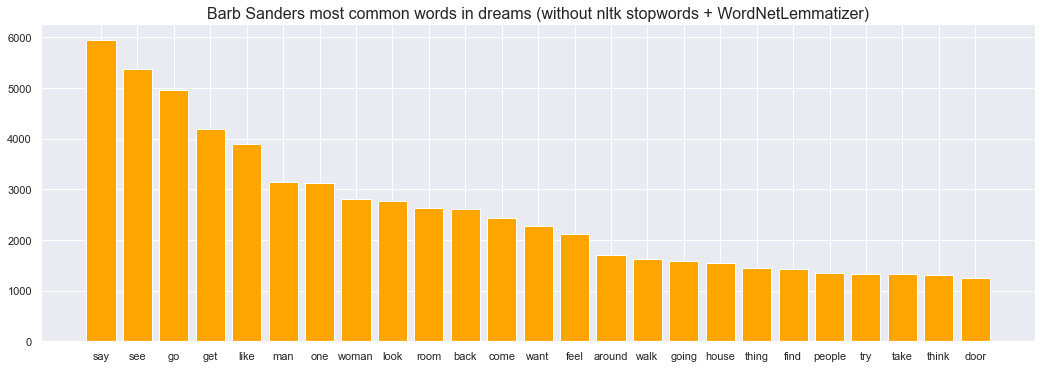

Wall time: 4min 15s


In [80]:
%%time

# Most used words
from collections import Counter
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords

# words in each dream
j = [regexp_tokenize(i, '\w+') for i in b_df.dream]

# all the words in all the dreams 
all_words = [x for i in j for x in i]

# convert to lower case and exclude stopwords
all_words = [i.lower() for i in all_words]
all_words = [i for i in all_words if i not in stopwords.words('english')]

# lemmatize 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
all_words = [lemmatizer.lemmatize(w) for w in all_words]

# Count the occurence of words in all dreams
counter = Counter(all_words)

n = 25

# n most common words
most_common = counter.most_common(n)
print("{} most common words used by {} ((nltk + WordNetLemmatizer + excluding stopwords)):\n \n{}".format(
      n, dreamer, most_common), "\n")

# from nltk.stem import WordNetLemmatizer --> tira o plural das palavras

# plot
[plt.bar(i, j, color='orange') for (i, j) in most_common]

plt.title("{} most common words in dreams (without nltk stopwords + WordNetLemmatizer)".format(dreamer), fontsize=16)
plt.subplots_adjust(left=0, bottom=-0.1, right=2.3, top=1, wspace=0, hspace=0)
plt.show()

### Word Cloud

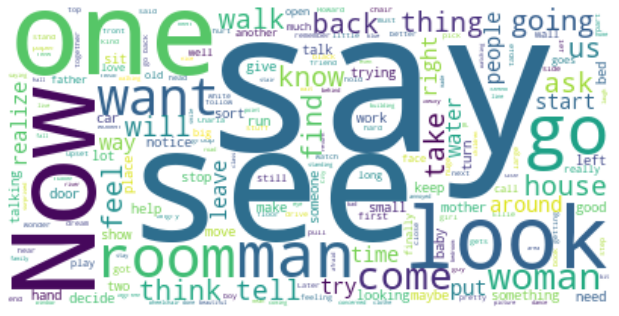

In [81]:
from wordcloud import WordCloud

bs_text = b_df['dream'].str.cat()

# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white').generate(bs_text)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
plt.subplots_adjust(left=0, bottom=-0.5, right=1.4, top=1, wspace=0, hspace=0)
plt.show()

#remember that it includes stopwords ('Now', for example)

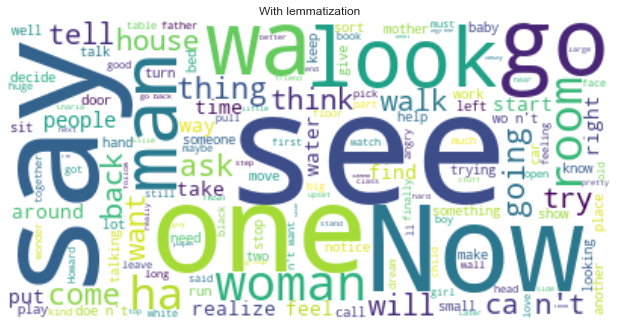

In [82]:
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

bs_text = b_df['dream'].str.cat()
bs_text2 = ' '.join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(bs_text)])

# Create and generate a word cloud image 
my_cloud2 = WordCloud(background_color='white').generate(bs_text2)

# Display the generated wordcloud image
plt.imshow(my_cloud2, interpolation='bilinear') 
plt.axis("off")
plt.title('With lemmatization')
plt.subplots_adjust(left=0, bottom=-0.5, right=1.4, top=1, wspace=0, hspace=0)
plt.show()

#### spaCy POS tagging

In [83]:
%%time
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# list of (future lists of) tokens and pos tags
tokens_pos = []
for i in b_df.dream:
    # Create the Doc object
    doc = nlp(i)
    # Generate list of tokens and pos tags
    pos = [(token.text, token.pos_) for token in doc]
    # append to list of all the tokens and tags in dreams
    tokens_pos.append(pos)
    
# primeiro criei uma lista que reúne a lista com tuples (palavra, POS tag) de cada sonho (token_pos) --> pode ser preciso
# mais tarde. (+3 minutos)
# agora crio um dicionário com todas as palavras associadas a cada POS tag, de todos os sonhos (543 milisegundos)
    
# POS tags
dict_POS = {}

# for each dream pos aggregate tuples
for i in tokens_pos:
    # for each tuple
    for tuple_pos in i:
        # add the word to the POS (example: 'Bill' to 'PROPN', or 'had' to 'VERB')
        if tuple_pos[1] not in dict_POS.keys():
            dict_POS[tuple_pos[1]] = []
            dict_POS[tuple_pos[1]] += [tuple_pos[0]]
        else:
            dict_POS[tuple_pos[1]] += [tuple_pos[0]]
            

Wall time: 3min 47s


In [84]:
# POS tags encontrados
print(dict_POS.keys())

dict_keys(['PRON', 'AUX', 'DET', 'ADJ', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'CCONJ', 'VERB', 'ADV', 'SCONJ', 'PART', 'SPACE', 'INTJ', 'NUM', 'SYM', 'X'])


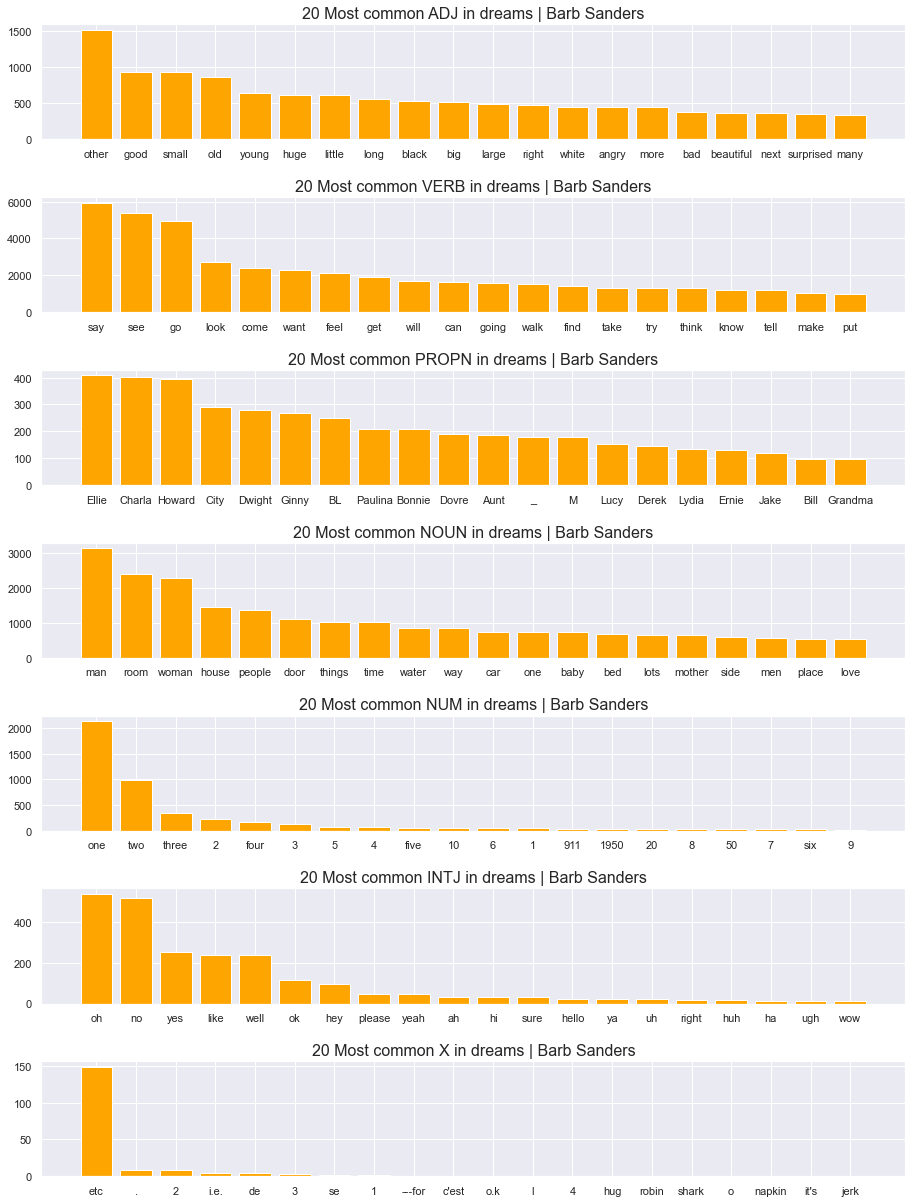

In [85]:
# several plots
from nltk.stem import WordNetLemmatizer

# Count the occurence of POS tags in all dreams

# POS tag annotations - ver https://spacy.io/api/annotation
pos_tags = ['ADJ', 'VERB', 'PROPN', 'NOUN', 'NUM', 'INTJ', 'X']  # 'X' means other tags

# number we want to see
n = 20

# lemmatize verbs
counter_verb = Counter([WordNetLemmatizer().lemmatize(w).lower() for w in dict_POS['VERB']])  # lower and lemmatize

###########################################################

for i, j in enumerate(pos_tags):
    # Count the POS tag - also lower case them all except if it is a proper noun
    if j == 'PROPN':
        counter = Counter(dict_POS[j])  # normal
    elif j == 'VERB':
        counter = counter_verb  # lower and lemmatize
    else:
        counter = Counter([i.lower() for i in dict_POS[j]])  # lower
    # n most common tags
    most_common = counter.most_common(n)
    # plot
    plt.subplot(len(pos_tags), 1, i+1)
    [plt.bar(i, j, color='orange') for (i, j) in most_common]
    plt.title("{} Most common {} in dreams | {}".format(n, pos_tags[i], dreamer), fontsize=16)

plt.subplots_adjust(left=0, bottom=-3, right=2, top=1, wspace=0, hspace=0.5)
plt.show()

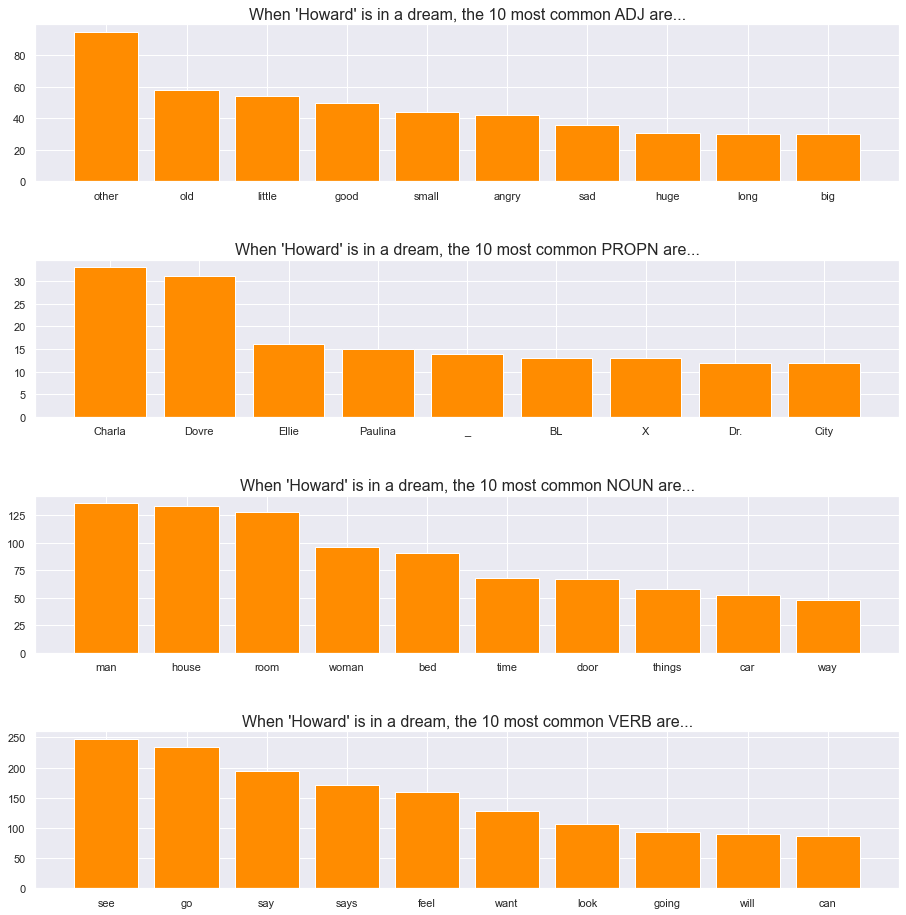

In [86]:
# Plot POS against each other

# NECESSARY to define 'what_X' AND 'what_X_type'
what_X = 'Howard'
what_X_type = 'PROPN'
common_whats = ['ADJ', 'PROPN', 'NOUN', 'VERB']
n = 10

for nr, what in enumerate(common_whats):
    # create list of lists with the common what
    counter_what = []
    for i in tokens_pos:
        dream_ex = i
        if what_X in [tuple_word[0] for tuple_word in dream_ex]:
            counter_what.append([tuple_word[0] for tuple_word in dream_ex if tuple_word[1] == what])

    # just a list with the counter_whats
    counter_whats = []
    for i in counter_what:
        for adj_dream in i:
            counter_whats.append(adj_dream)
        
    # Counter
    counter = Counter(counter_whats)

    # n most common words
    if what == what_X_type:
        most_common = counter.most_common(n)[1:]  # tira-se a própria what_X
    else:
        most_common = counter.most_common(n)
    #print(most_common)  

    # plot
    plt.subplot(len(common_whats), 1, nr+1)
    [plt.bar(i, j, color='darkorange') for (i, j) in most_common]
    plt.title("""When '{}' is in a dream, the {} most common {} are...""".format(what_X, n, what), fontsize=16)

plt.subplots_adjust(left=0, bottom=-2, right=2, top=1, wspace=0, hspace=0.5)
plt.show()

### **NER - Named Entity Recognition**

**SpaCy NER**

In [87]:
%%time
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# list of (future lists of) ner tags
tokens_ner = []
for i in b_df.dream:
    # Create the Doc object
    doc = nlp(i)
    # Generate list of tokens and ner tags
    ner = [(ent.text, ent.label_) for ent in doc.ents]
    # append to list of all the tokens and tags in dreams
    tokens_ner.append(ner)
    
##### mesmo processo que o anterior 
    
# ner tags
dict_NER = {}

# for each dream ner aggregate tuples
for i in tokens_ner:
    # for each tuple
    for tuple_ner in i:
        # add the word to the ner (example: 'Bill' to 'PERSON', or 'France' to 'GPE')
        if tuple_ner[1] not in dict_NER.keys():
            dict_NER[tuple_ner[1]] = []
            dict_NER[tuple_ner[1]] += [tuple_ner[0]]
        else:
            dict_NER[tuple_ner[1]] += [tuple_ner[0]]            


Wall time: 3min 48s


In [88]:
# NER tags encontrados
print(dict_NER.keys())

dict_keys(['PERSON', 'TIME', 'GPE', 'QUANTITY', 'CARDINAL', 'DATE', 'FAC', 'NORP', 'ORG', 'LOC', 'ORDINAL', 'WORK_OF_ART', 'PRODUCT', 'LANGUAGE', 'PERCENT', 'MONEY', 'EVENT', 'LAW'])


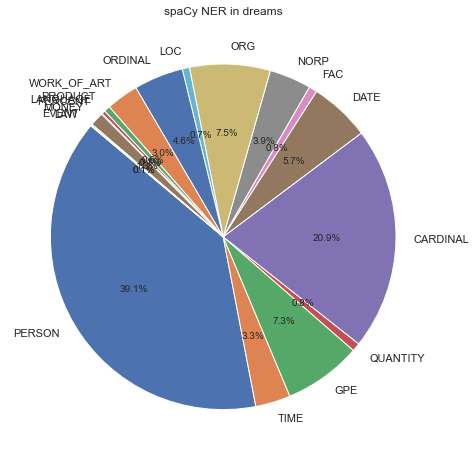

In [89]:
# pie chart

# Create a list from the dictionary keys for the chart labels: labels
labels = list(dict_NER.keys())

# Create a list of the values: values
values = [len(dict_NER[l]) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.title("spaCy NER in dreams")
plt.subplots_adjust(left=0, bottom=-0.5, right=1.7, top=1, wspace=0, hspace=0)
plt.show()

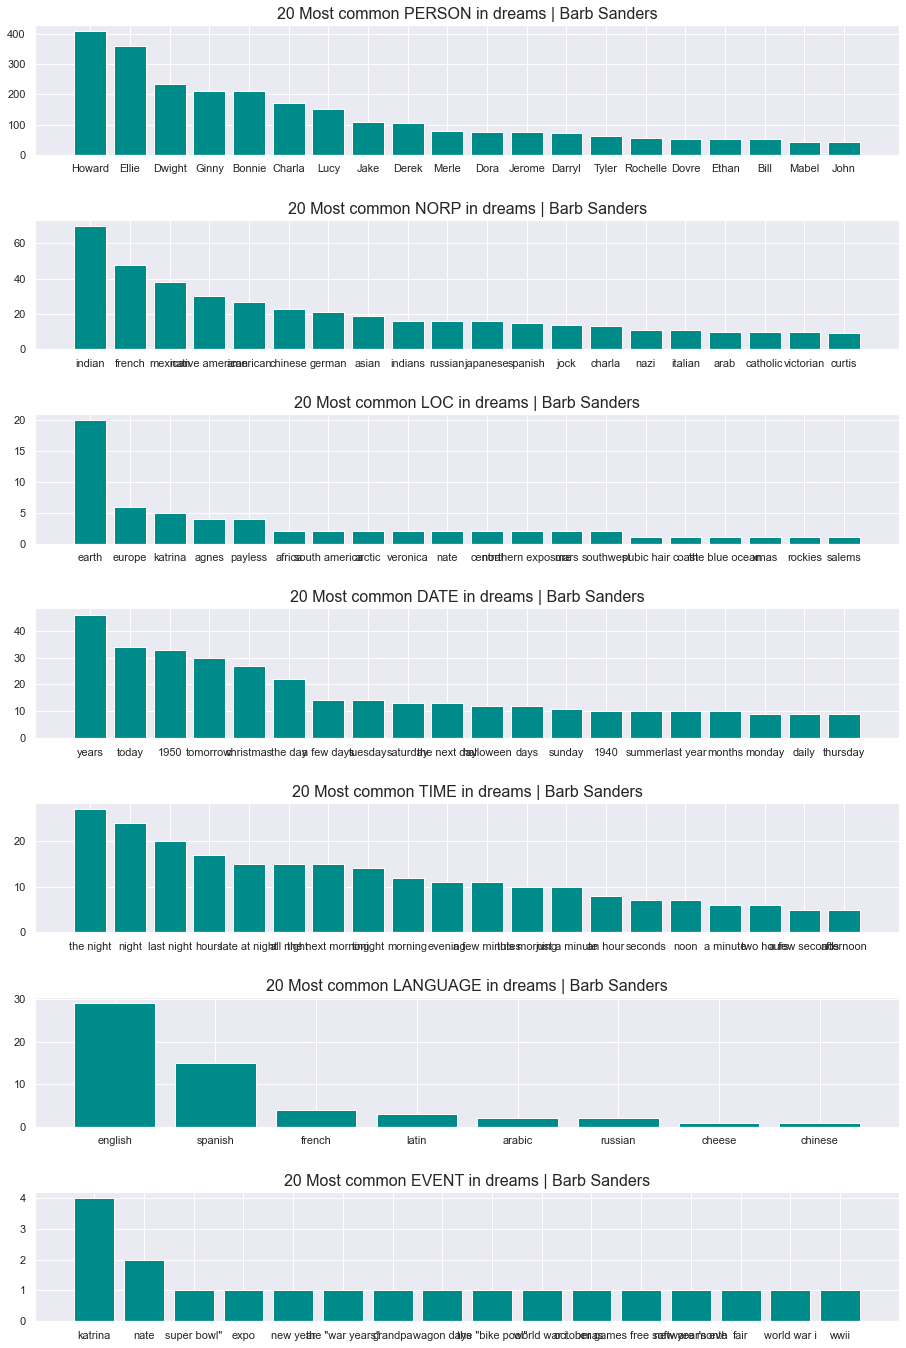

In [90]:
# several plots

# Count the occurence of ner tags in all dreams

# ner tag annotations - https://spacy.io/api/annotation#named-entities
ner_tags = ['PERSON', 'NORP', 'LOC', 'DATE', 'TIME', 'LANGUAGE', 'EVENT'] 

# number we want to see
n = 20

###########################################################

for i, j in enumerate(ner_tags):
    # Count the ner tag - also lower case them all except if it is a proper noun
    if j == 'PERSON':
        counter = Counter(dict_NER[j])  # normal
    else:
        counter = Counter([i.lower() for i in dict_NER[j]])  # lower
    # n most common tags
    most_common = counter.most_common(n)
    # plot
    plt.subplot(len(ner_tags), 1, i+1)
    [plt.bar(i, j, color='darkcyan') for (i, j) in most_common]
    plt.title("{} Most common {} in dreams | {}".format(n, ner_tags[i], dreamer), fontsize=16)

plt.subplots_adjust(left=0, bottom=-3.5, right=2, top=1, wspace=0, hspace=0.5)
plt.show()

In [91]:
# relate POS and NER


**nltk NER**

In [92]:
%%script false  # para já não é preciso
%%time
# nltk NER
token_sentences = [regexp_tokenize(w, '\w+') for w in b_df.dream]
# token_sentences = [word_tokenize(w) for w in b_df.dream]  ## é preciso manter as maiúsculas, etc
pos_dreams = [nltk.pos_tag(d) for d in token_sentences]
chunked_sentences = nltk.ne_chunk_sents(pos_dreams)

###### Chart

from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels. Same for values
labels = list(ner_categories.keys())
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.subplots_adjust(left=0, bottom=-0.5, right=1, top=1, wspace=0, hspace=0)
plt.title("Named Entities in dreams")
plt.show()
ner_categories

Couldn't find program: 'false'


**polyglot .entities**

In [93]:
#polyglot --> maybe it's better for other languages than English
from polyglot.text import Text

# dream 
n = 200
dream_number = b_df.dream.iloc[n]
ptext = Text(dream_number)
print(ptext, "\n")

print(ptext.entities)  # melhor

########OR

entities = [(ent.tag, ' '.join(ent)) for ent in ptext.entities]
entities

Ginny and I have an argument. She's explaining something to me. I find it hard to listen. I then see she's saying and doing some incredible things. Things and words and colors are coming out of her mouth like vomit. I'm scared and concerned for her and I'm also upset because these things have meaning for me, to help me. I ask her what drug she's on. My brother Dwight is there. She says, "9." I ask Dwight what that is. She follows me around and won't stop. After what seems like a long time, I start to do it too. Suddenly I see dazzling, sparkling blue and red colors like fireworks or prism colors on the end of my tongue. Ginny's face goes out of focus. I am aware that I'm letting go and I'm in a different state of awareness. I talk rapidly, non-stop, and I'm vaguely aware that I might be saying hurtful things that could hurt other people's feelings, but I know I must and it's O.K. It spews out of me unchecked. 

[I-PER(['Ginny']), I-PER(["I'm"]), I-PER(['Dwight']), I-PER(['Dwight']), I-

[('I-PER', 'Ginny'),
 ('I-PER', "I'm"),
 ('I-PER', 'Dwight'),
 ('I-PER', 'Dwight'),
 ('I-PER', "it's")]

### Relate POS tags, NER and polarity

In [94]:
%%time
# define the good and bad dreams based on polarity
polarity_threshold = 0.5
good_dreams_df = b_df[b_df['polarity'] >= polarity_threshold];print("good dreams df shape: {}".format(good_dreams_df.shape))
bad_dreams_df = b_df[b_df['polarity'] <= -polarity_threshold];print("bad dreams df shape: {}".format(bad_dreams_df.shape))

##################################################################################

# new POS for good
nlp = spacy.load('en_core_web_sm')

# list of (future lists of) tokens and pos tags
tokens_pos_good = []
for i in good_dreams_df.dream:
    # Create the Doc object
    doc = nlp(i)
    # Generate list of tokens and pos tags
    pos = [(token.text, token.pos_) for token in doc]
    # append to list of all the tokens and tags in dreams
    tokens_pos_good.append(pos)
    
# POS tags
dict_POS_good = {}

# for each dream pos aggregate tuples
for i in tokens_pos_good:
    # for each tuple
    for tuple_pos in i:
        # add the word to the POS (example: 'Bill' to 'PROPN', or 'had' to 'VERB')
        if tuple_pos[1] not in dict_POS_good.keys():
            dict_POS_good[tuple_pos[1]] = []
            dict_POS_good[tuple_pos[1]] += [tuple_pos[0]]
        else:
            dict_POS_good[tuple_pos[1]] += [tuple_pos[0]]
            
##################################################################################

# new POS for bad
nlp = spacy.load('en_core_web_sm')

# list of (future lists of) tokens and pos tags
tokens_pos_bad = []
for i in bad_dreams_df.dream:
    # Create the Doc object
    doc = nlp(i)
    # Generate list of tokens and pos tags
    pos = [(token.text, token.pos_) for token in doc]
    # append to list of all the tokens and tags in dreams
    tokens_pos_bad.append(pos)
    
# POS tags
dict_POS_bad = {}

# for each dream pos aggregate tuples
for i in tokens_pos_bad:
    # for each tuple
    for tuple_pos in i:
        # add the word to the POS (example: 'Bill' to 'PROPN', or 'had' to 'VERB')
        if tuple_pos[1] not in dict_POS_bad.keys():
            dict_POS_bad[tuple_pos[1]] = []
            dict_POS_bad[tuple_pos[1]] += [tuple_pos[0]]
        else:
            dict_POS_bad[tuple_pos[1]] += [tuple_pos[0]]

good dreams df shape: (42, 19)
bad dreams df shape: (32, 19)
Wall time: 4.12 s


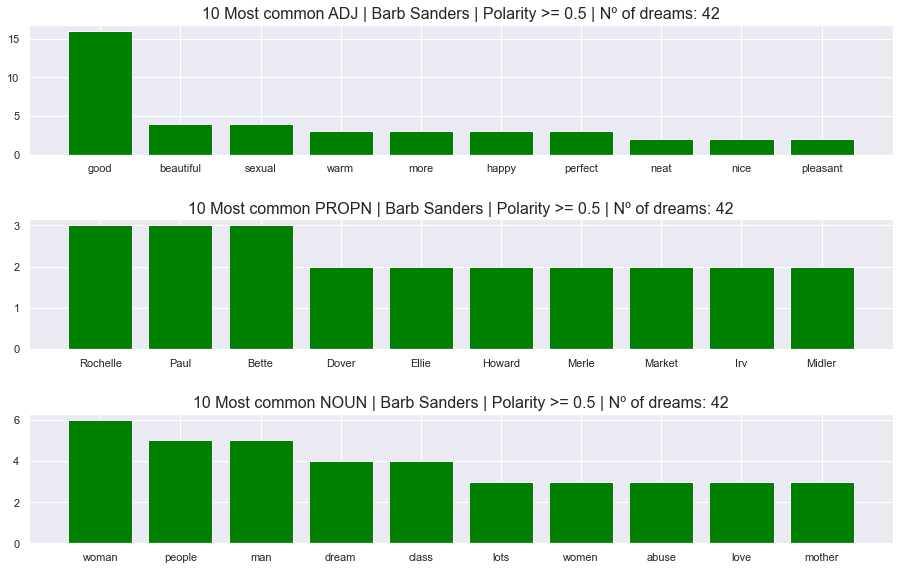

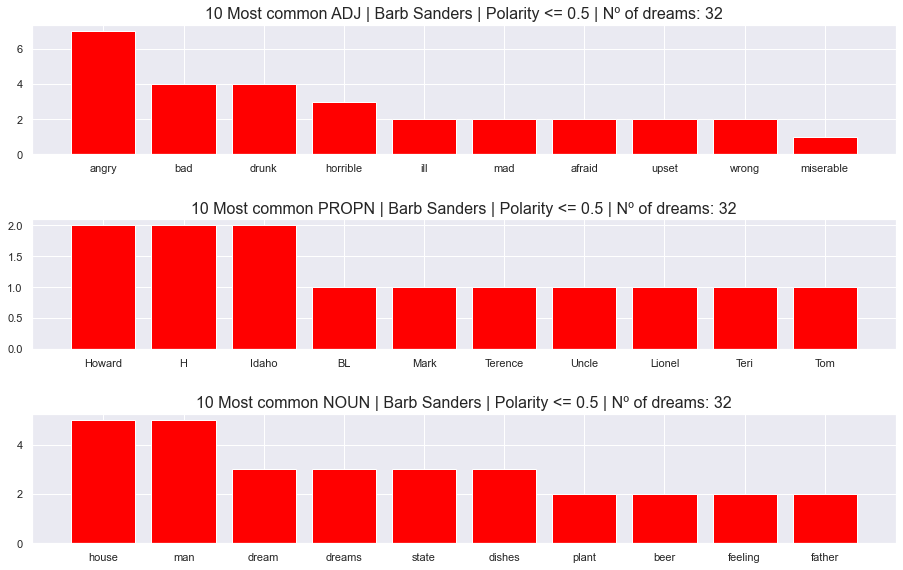

In [95]:
# POS tag annotations - ver https://spacy.io/api/annotation
pos_tags = ['ADJ', 'PROPN', 'NOUN']  

# number we want to see
n = 10

#########################################################################

# GOOD

# lemmatize verbs
counter_verb = Counter([WordNetLemmatizer().lemmatize(w).lower() for w in dict_POS_good['VERB']])  # lower and lemmatize

for i, j in enumerate(pos_tags):
    # Count the POS tag - also lower case them all except if it is a proper noun
    if j == 'PROPN':
        counter = Counter(dict_POS_good[j])  # normal
    elif j == 'VERB':
        counter = counter_verb  # lower and lemmatize
    else:
        counter = Counter([i.lower() for i in dict_POS_good[j]])  # lower
    # n most common tags
    most_common = counter.most_common(n)
    # plot
    plt.subplot(len(pos_tags), 1, i+1)
    [plt.bar(i, j, color='green') for (i, j) in most_common]
    plt.title("{} Most common {} | {} | Polarity >= {} | Nº dreams: {}".format(n, pos_tags[i], dreamer, 
                polarity_threshold, good_dreams_df.shape[0]), fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.8, right=2, top=1, wspace=0, hspace=0.5)
plt.show()

print("="*120)
###########################################################=========================================#############

# BAD

# lemmatize verbs
counter_verb = Counter([WordNetLemmatizer().lemmatize(w).lower() for w in dict_POS_bad['VERB']])  # lower and lemmatize

for i, j in enumerate(pos_tags):
    # Count the POS tag - also lower case them all except if it is a proper noun
    if j == 'PROPN':
        counter = Counter(dict_POS_bad[j])  # normal
    elif j == 'VERB':
        counter = counter_verb  # lower and lemmatize
    else:
        counter = Counter([i.lower() for i in dict_POS_bad[j]])  # lower
    # n most common tags
    most_common = counter.most_common(n)
    # plot
    plt.subplot(len(pos_tags), 1, i+1)
    [plt.bar(i, j, color='red') for (i, j) in most_common]
    plt.title("{} Most common {} | {} | Polarity <= {} | Nº dreams: {}".format(n, pos_tags[i], dreamer, 
              polarity_threshold, bad_dreams_df.shape[0]), fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.8, right=2, top=1, wspace=0, hspace=0.5)
plt.show()

### Latent Dirichlet allocation (LDA)

LDA is able to perform **topic detection** on large document sets, determining what the main 'topics' are in a large unlabeled set of texts. A 'topic' is a collection of words that tend to co-occur often. The hypothesis is that LDA might be able to clarify what the different topics in dreams are. These topics can then be used as a starting point for further analysis.

LDA does not work directly on text data. First, it is necessary to convert the documents into a simple vector representation. This representation will then be used by LDA to determine the topics. Each entry of a 'document vector' will correspond with the number of times a word occurred in the document.

##### Reducing dimensionality (lemmatization, remove stopwords, non-alphabetic characters, etc)

In [96]:
%%time
# Reducing dimensionality

# spaCy stopwords
stopwords_spacy = spacy.lang.en.stop_words.STOP_WORDS.copy()

# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text) #, disable=['ner', 'parser']
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords_spacy]
    return ' '.join(a_lemmas)

# create Series
lem_barb = b_df['dream'].apply(preprocess)

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = CountVectorizer().fit_transform(b_df['dream'])
bow_lem_matrix = vectorizer.fit_transform(lem_barb)

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)
print("""It reduced dimensionality from {} to {} after preprocessing.""".format(bow_matrix.shape, bow_lem_matrix.shape))
lem_barb.head()

(4254, 12867)
It reduced dimensionality from (4254, 17775) to (4254, 12867) after preprocessing.
Wall time: 3min 52s


682                           neat dream Blake Reta Bill
683                                     neat dream Blake
684                             dream Nate come feel use
685    second night row dream Jon try impression emba...
686             dream night wake dream Mitch Darryl love
Name: dream, dtype: object

The only parameter we will tweak is the number of topics in the LDA algorithm. Typically, one would calculate the 'perplexity' metric to determine which number of topics is best and iterate over different amounts of topics until the lowest 'perplexity' is found. For now, let's play around with a different number of topics. From there, we can distinguish what each topic is about.

In [97]:
%%time
# Load the LDA model from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below 
number_topics = 7
number_words = 7

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(bow_lem_matrix)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vectorizer, number_words)

Topics found via LDA:

Topic #0:
room look like feel come house try

Topic #1:
walk look room like find woman sit

Topic #2:
man like woman come run audience fire

Topic #3:
man like woman look want come feel

Topic #4:
look like woman room find dream play

Topic #5:
look water man come walk like car

Topic #6:
woman come try sit feel walk like
Wall time: 46.1 s


In [98]:
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vectorizer.get_feature_names())

import mglearn

mglearn.tools.print_topics(topics=range(number_topics), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=7, n_words=number_words)

topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       topic 6       
--------      --------      --------      --------      --------      --------      --------      
room          walk          man           man           look          look          woman         
look          look          like          like          like          water         come          
like          room          woman         woman         woman         man           try           
feel          like          come          look          room          come          sit           
come          find          run           want          find          walk          feel          
house         woman         audience      come          dream         like          walk          
try           sit           fire          feel          play          car           like          




In [99]:
# classificar os sonhos e prever com modelo. enquanto que acima mostrava correlação entre palavras aqui poderia ser
# algo mais do que isso. p ex prever sonho 'bom' ou 'mau'. colocar probabilidades de certas palavras aparecerem uma vez que
# o sonho é 'bom' ou 'mau' (prob condicionada). Por ordem decrescente. Trata-se de feature selection na verdade, e esta
# seria apenas uma técnica possível. Ver exercício springboard. fazer com modelo geral (género M ou F) em baixo
# talvez faça mais sentido para casos individuais do que para a generalidade uma vez que a distribuição de sonhos é !=

### Latent Semantic Analysis (LSA)

In [100]:
%%time

# use Tfidf, with max_features=1000
vectorizer = TfidfVectorizer(stop_words='english', 
                             max_features= 1000)

# on the preprocessed texts (lem_barb)
vec = vectorizer.fit_transform(lem_barb)

# The next step is to represent each and every term and document as a vector. I will use the document-term matrix and
# decompose it into multiple matrices. I will use sklearn's TruncatedSVD to perform the task of matrix decomposition.

from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=number_topics, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(vec)

terms = vectorizer.get_feature_names()

# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(svd_model.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vectorizer.get_feature_names())

import mglearn

mglearn.tools.print_topics(topics=range(number_topics), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=7, n_words=number_words)


topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       topic 6       
--------      --------      --------      --------      --------      --------      --------      
man           room          dream         baby          dream         baby          dream         
like          house         room          howard        drive         class         baby          
look          door          howard        love          car           play          man           
room          look          baby          feel          howard        stage         water         
woman         window        bed           water         baby          ask           woman         
come          bedroom       love          hold          water         audience      swim          
want          water         feel          bed           road          work          huge          


Wall time: 1.1 s


In [101]:
print(pd.DataFrame(svd_model.components_).shape)
pd.DataFrame(svd_model.components_)

(7, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.014571,0.008241,0.010916,0.008286,0.020656,0.009943,0.012110,0.006965,0.007785,0.010016,...,0.011191,0.045184,0.014455,0.025079,0.009598,0.033605,0.025576,0.017616,0.027469,0.066284
1,-0.017159,-0.000115,-0.010910,-0.002796,-0.037012,-0.020568,-0.003826,0.005237,-0.000483,0.008192,...,-0.001196,-0.039539,0.002099,-0.014085,0.014433,-0.012064,0.006717,0.018674,-0.021557,-0.084891
2,0.000730,0.006027,-0.003993,0.002789,-0.001940,-0.002969,-0.000364,0.005719,-0.003716,0.001575,...,-0.000408,0.049860,0.012485,-0.014784,-0.002834,0.055697,-0.021120,0.002674,0.003680,-0.021507
3,0.002420,0.007677,-0.001960,0.003711,-0.011363,-0.014918,0.000663,-0.010431,-0.006447,-0.005009,...,0.006938,-0.123439,-0.027467,-0.002820,0.004499,0.032639,0.024558,-0.008901,-0.013243,0.023567
4,0.005150,0.009143,-0.007344,-0.001713,-0.008461,-0.009203,0.001633,0.002076,0.002555,-0.005576,...,0.000019,0.063423,0.006039,0.006176,-0.001915,0.017687,0.021911,-0.005747,-0.001394,-0.074014
5,-0.003111,0.000895,-0.001729,-0.001801,0.024067,0.014476,-0.002325,0.003017,0.001278,-0.007430,...,0.011017,0.028495,0.012547,0.008500,-0.008188,0.018011,-0.012227,0.004421,0.011610,-0.016906
6,0.002797,-0.006317,0.000601,-0.001024,-0.010531,-0.001003,0.000730,0.003216,-0.006142,-0.007068,...,0.002141,0.010973,0.005907,-0.011941,-0.006430,-0.042185,0.001799,0.008629,-0.022715,0.034561


### Topics Visualization

#### PCA

#### t-SNE 

In [102]:
print(pd.DataFrame(svd_model.fit_transform(vec)).shape)
pd.DataFrame(svd_model.fit_transform(vec)).head()

(4254, 7)


,0,1,2,3,4,5,6
0,0.058614,-0.069520,0.351846,-0.365754,0.464920,-0.360353,0.464633
1,0.058614,-0.069520,0.351846,-0.365754,0.464920,-0.360353,0.464633
2,0.142305,-0.068401,0.244647,-0.151844,0.242747,-0.201571,0.163299
3,0.195610,-0.124117,0.166424,-0.138726,0.220479,-0.202685,0.194042
4,0.088294,-0.119707,0.321160,-0.190995,0.301033,-0.351740,0.270081


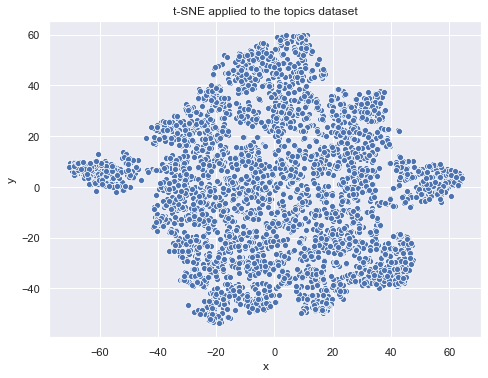

In [103]:
df_svd = pd.DataFrame(svd_model.fit_transform(vec))

# Fitting t-SNE
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

# while fitting to the dataset, TSNE will try different configurations and evaluate these with an internal cost function.
# High learning rates will cause the algorithm to be more adventurous in the configuration it tries out while low learning
#  rates will make it more conservative. Usually, learning rates are between 10 - 1000 range

tsne_features = m.fit_transform(df_svd)  # this will project our high dimensional data set onto
                                                          # a numpy array with 2 dimensions

# Assigning t-SNE features to our dataset

df_svd['x'] = tsne_features[:,0]
df_svd['y'] = tsne_features[:,1]

####

# Plotting t-SNE
sns.scatterplot(x="x", y="y", data=df_svd)
plt.title("t-SNE applied to the topics dataset")
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [104]:
df_svd.head()

,0,1,2,3,4,5,6,x,y
0,0.058614,-0.069520,0.351846,-0.365754,0.464920,-0.360353,0.464633,-70.301468,9.238794
1,0.058614,-0.069520,0.351846,-0.365754,0.464920,-0.360353,0.464633,-70.301468,9.238794
2,0.142305,-0.068401,0.244647,-0.151844,0.242747,-0.201571,0.163299,-67.427025,5.529866
3,0.195610,-0.124117,0.166424,-0.138726,0.220479,-0.202685,0.194042,-62.491516,8.369889
4,0.088294,-0.119707,0.321160,-0.190995,0.301033,-0.351740,0.270081,-69.241920,6.811164


#### UMAP (Uniform Manifold Approximation and Projection)

In [105]:
%%script false
import umap

vec_topics = svd_model.fit_transform(vec)

embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(vec_topics)

plt.scatter(embedding[:, 0], embedding[:, 1], s = 10)#, edgecolor='none')
plt.show()

Couldn't find program: 'false'


### CorEx

In [106]:
%%time
from corextopic import corextopic as ct

# Create CountVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(b_df['dream'])
vocab = vectorizer.get_feature_names()

TOPICS = 5
NBR_OF_WORDS = 3

model = ct.Corex(n_hidden=TOPICS, seed=42)
model = model.fit(bow_matrix, words=vocab)
model

Wall time: 34 s


## 2.2.5) Sentiment Analysis

#### TextBlob

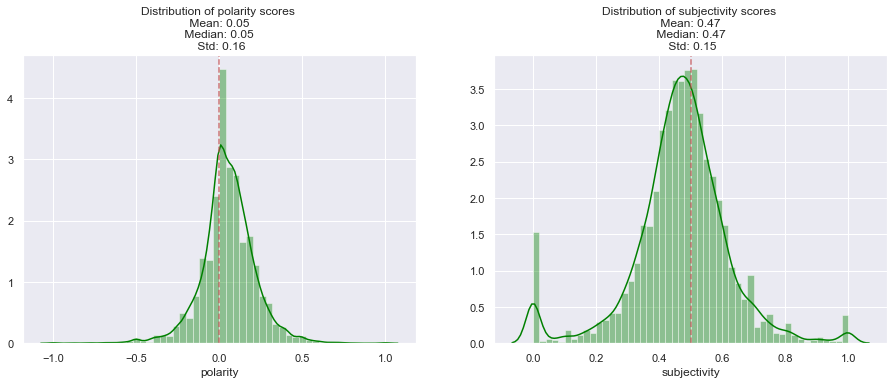

In [107]:
# polarity distribution
plt.subplot(1, 2, 1)
sns.distplot(b_df['polarity'], color='green')
plt.axvline(x=0, color='r', alpha=0.75, linestyle='--')
plt.title("""Distribution of polarity scores \n Mean: {} \n Median: {} \n Std: {}""".format(
          round(np.mean(b_df['polarity']), 2), round(np.median(b_df['polarity']), 2), round(np.std(b_df['polarity']), 2)))

# subjectivity scores
plt.subplot(1, 2, 2)
sns.distplot(b_df['subjectivity'], color='green')
plt.axvline(x=0.5, color='r', alpha=0.75, linestyle='--')
plt.title("""Distribution of subjectivity scores \n Mean: {} \n Median: {} \n Std: {}""".format(
          round(np.mean(b_df['subjectivity']), 2), round(np.median(b_df['subjectivity']), 2),
          round(np.std(b_df['subjectivity']), 2)))
    
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

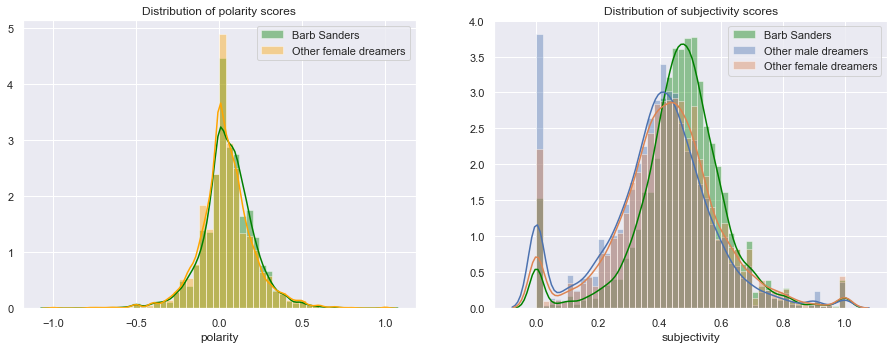

In [108]:
# Comparing with other dreamers

# Polarity and subjectivity
df_without_dreamer = dreams_df[~dreams_df.index.isin(b_df.index)]

# polarity distribution
plt.subplot(1, 2, 1)
sns.distplot(b_df['polarity'], color='green')
sns.distplot(df_without_dreamer[df_without_dreamer['sex'] == 'F']['polarity'], color='orange')
plt.title("""Distribution of polarity scores""")
plt.legend(['Barb Sanders', 'Other female dreamers'])

# subjectivity scores
plt.subplot(1, 2, 2)
sns.distplot(b_df['subjectivity'], color='green')
sns.distplot(df_without_dreamer[df_without_dreamer['sex'] == 'M']['subjectivity'])
sns.distplot(df_without_dreamer[df_without_dreamer['sex'] == 'F']['subjectivity'])

plt.title("""Distribution of subjectivity scores""")
plt.legend(['Barb Sanders', 'Other male dreamers', 'Other female dreamers'])
    
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

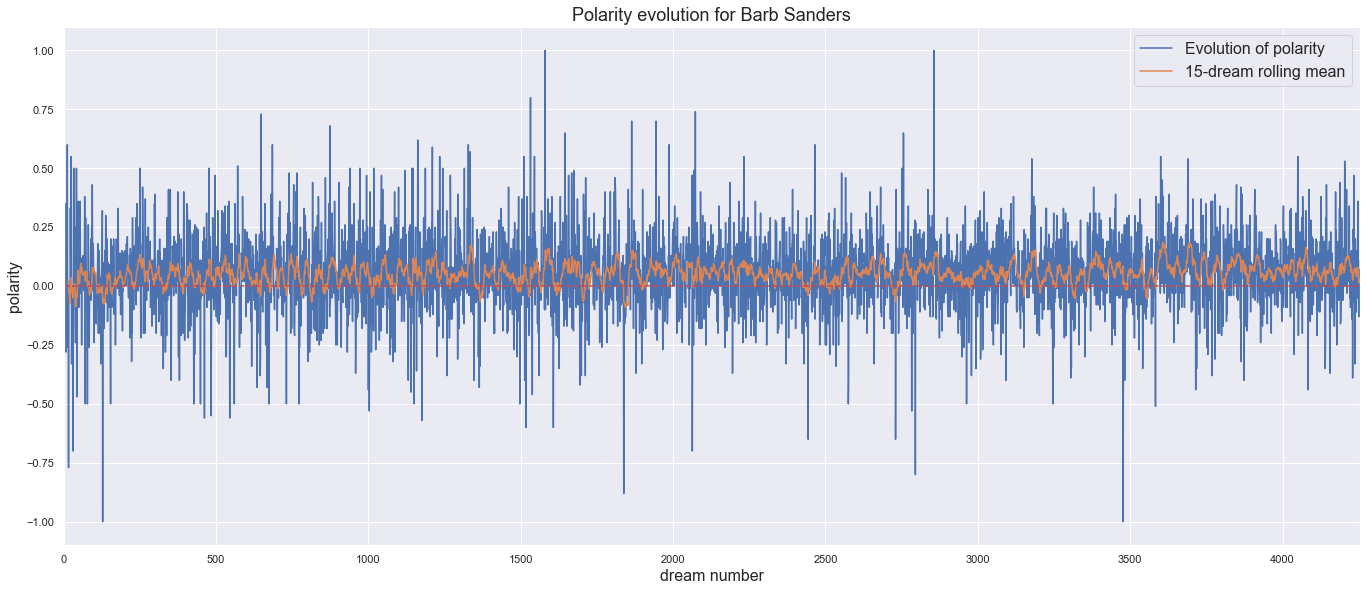

In [109]:
# evolution of polarity (the dreams are by order of date)
b_df['polarity'].reset_index(drop=True).plot()

# 15-dream(not day) rolling mean
rm = 15
b_df['polarity'].rolling(rm).mean().reset_index(drop=True).plot()

plt.title('Polarity evolution for Barb Sanders', fontsize=18)
plt.xlabel('dream number', fontsize=16)
plt.ylabel('polarity', fontsize=16)
plt.legend(['Evolution of polarity', '{}-dream rolling mean'.format(rm)], fontsize=16)
plt.axhline(0, color='r', linestyle='--')

plt.subplots_adjust(left=0, bottom=-0.8, right=3, top=1, wspace=0.2, hspace=0)
plt.show()

#### VADER

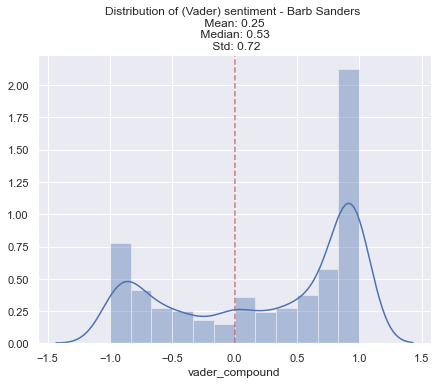

In [110]:
# VADER Sentiment Analysis
plt.subplot(1, 2, 1)
sns.distplot(b_df['vader_compound'])
plt.axvline(x=0, color='r', alpha=0.75, linestyle='--')
plt.title("""Distribution of (Vader) sentiment - Barb Sanders \n Mean: {} \n Median: {} \n Std: {}""".format(
    round(np.mean(b_df['vader_compound']), 2), round(np.median(b_df['vader_compound']), 2), 
    round(np.std(b_df['vader_compound']), 2)))

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

#### Exclamations Barb Sanders

A text with many punctuation signs could signal a very emotionally charged dream.


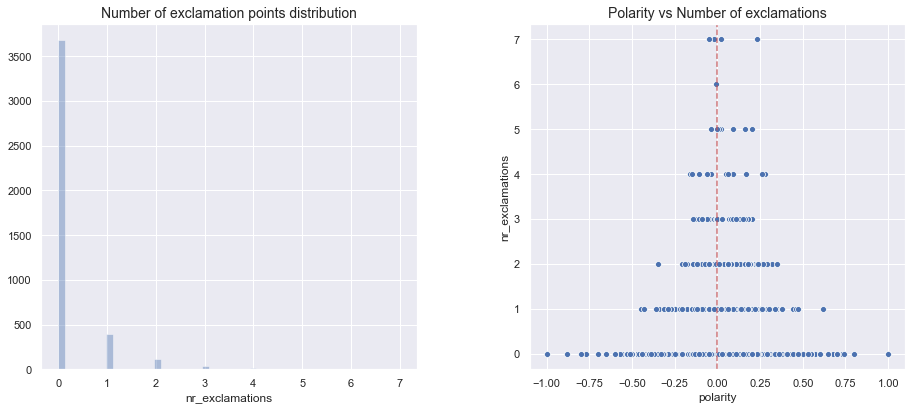

Correlation between polarity and the number of exclamations (with > 0 exclamations): 0.02


In [111]:
# A text with many punctuation signs could signal a very emotionally charged dream
print("A text with many punctuation signs could signal a very emotionally charged dream.")

# distribution
plt.subplot(1, 2, 1)
sns.distplot(b_df['nr_exclamations'], kde=False)
plt.title('Number of exclamation points distribution', fontsize=14)

# relationship between the number of exclamations and polarity
plt.subplot(1, 2, 2)
sns.scatterplot('polarity', 'nr_exclamations', data=b_df)
plt.axvline(x=0, color='r', alpha=0.75, linestyle='--')
plt.title('Polarity vs Number of exclamations', fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.2, right=2, top=1, wspace=0.3, hspace=0)
plt.show()

# when there is at least 1 exclamation point
excl_df = b_df[b_df['nr_exclamations'] >= 1]
print("""Correlation between polarity and the number of exclamations (with > 0 exclamations): {}""".format(
    round(excl_df[['polarity', 'nr_exclamations']].corr().iloc[0, 1], 2)))

In [112]:
# is it really emotionally charged? (using polarity to compare) - crude

for i in range(1, np.max(excl_df['nr_exclamations']) + 1):
    print("Polarity St.dev with {} exclamations: {}".format(i, 
                                                   round(np.std(excl_df[excl_df['nr_exclamations'] == i].polarity), 2)))

Polarity St.dev with 1 exclamations: 0.14
Polarity St.dev with 2 exclamations: 0.12
Polarity St.dev with 3 exclamations: 0.09
Polarity St.dev with 4 exclamations: 0.15
Polarity St.dev with 5 exclamations: 0.08
Polarity St.dev with 6 exclamations: 0.0
Polarity St.dev with 7 exclamations: 0.11


In [113]:
# outra forma de contar o número de '!' mas com o CountVectorizer / BoW
pd.Series(np.squeeze(CountVectorizer(token_pattern=r'[!]').fit_transform(b_df.dream).toarray())).value_counts()

0    3678
1     397
2     114
3      40
4      13
5       7
7       4
6       1
dtype: int64

#### BoW / N-Gram models

In [114]:
# Bag-of-Words model
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object (with max_features & n-grams(uni and bi))
vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2))

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(b_df.dream)

# Print the shape of bow_matrix
print(bow_matrix.shape)

pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names()).head()

(4254, 1000)


,about,about it,about the,across,across the,afraid,after,again,against,agree,...,wrong,years,yellow,yes,yet,you,you can,young,young man,your
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


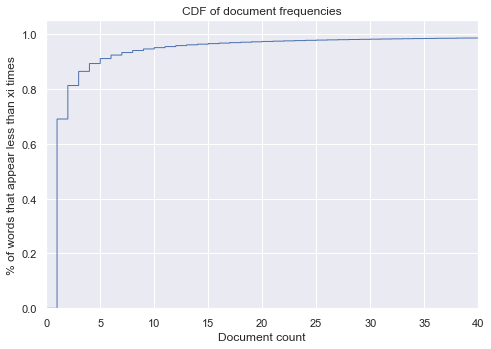

In [115]:
# Cumulative distribution (CDF) of document frequencies ---> to choose max_df and min_df

bow_to_choose = CountVectorizer(ngram_range=(1, 2)).fit_transform(b_df.dream)

# build the CDF
doc_freq = pd.Series(sorted(np.sum(bow_to_choose, axis=0).tolist()[0]))
cum = np.arange(np.sum(doc_freq))

# plot 
plt.hist(doc_freq, cum, density=True, cumulative=True, histtype='step')
plt.xlim(0, 40)
plt.title("CDF of document frequencies")
plt.xlabel("Document count")
plt.ylabel("% of words that appear less than xi times")

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.4, hspace=0)
plt.show()

# min_df =  1?
# max_df = 30 ?

In [116]:
# Tf-Idf
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer().fit(b_df['dream'])

X = vect.transform(b_df['dream'])

X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

print("Tf-Idf: words/tokens with weights:")
X_df.head()

Tf-Idf: words/tokens with weights:


,00,000,0000,05,08,10,100,1000,101,105,...,zipping,zippy,zips,zoe,zombie,zombies,zone,zoo,zoom,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Good and bad sentiment word predictors (using the polarity algorithm as a classification system)

(4254, 17775)
(4254, 10974)
Number of positive (polarity>=0) and negative (polarity<0) dreams:
 1    2685
0    1569
dtype: int64
score: 0.7847744360902256
AUC score: 0.7759353741496599


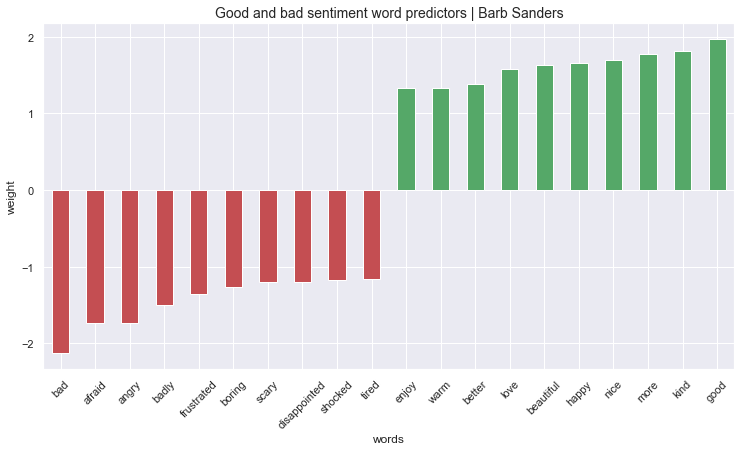

testar com n_grams n acrescenta grande coisa uma vez que o polarity já trata disso. Quanto muito veríamos que 
palavras aparecem no sentimento oposto mas com negações mais frequentemente.


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# dimensionality
print(CountVectorizer().fit_transform(b_df['dream']).shape)
print(CountVectorizer(min_df=2).fit_transform(b_df['dream']).shape)

# good (1) if polarity >= 0, else bad (0)
good_bad = [1 if i>0 else 0 for i in b_df['polarity']]

# imbalanced
print("Number of positive (polarity>=0) and negative (polarity<0) dreams:\n", pd.Series(good_bad).value_counts())

# train test split
X_dream = b_df['dream']
y_polarity = good_bad.copy()

text_train, text_val, y_train, y_test = train_test_split(X_dream, y_polarity, stratify=y_polarity, random_state=0)

# vectorizer
vect = CountVectorizer(min_df=2) 
        # words that appear in at least 2 documents 
      # score and AUC gets just slighly inferior (~0.002), but with "half" of dimensionality
        # Nota: cuidado que se pusermos stopwords esta inclui 'not', por exemplo!!

X_train = vect.fit_transform(text_train)
X_test = vect.transform(text_val)

###############################=============================================#############################


# Which words predict good or bad?
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV  # with CV takes 1 minute, same words

lr = LogisticRegression(class_weight='balanced', max_iter=1000).fit(X_train, y_train)

# parameter and score
# print("\nC parameter: ", lr.C_); 
print("score:", lr.score(X_test, y_test))
print("AUC score:", roc_auc_score(y_test, lr.predict(X_test)))

# weights for each word
feature_names = vect.get_feature_names()
features_weights = pd.DataFrame({'features': feature_names, 'weights': lr.coef_[0]})
features_weights = features_weights.sort_values('weights')

# plot
df_plot = pd.concat([features_weights[:10], features_weights[-10:]]).set_index('features')
df_plot['weights'].plot(kind='bar', legend=False, color=['g' if i>=0 else 'r' for i in df_plot['weights']])           

plt.xlabel('words')
plt.ylabel('weight')
plt.xticks(rotation=45)
plt.title('Good and bad sentiment word predictors | Barb Sanders', fontsize=14)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.6, top=1, wspace=0.4, hspace=0)
plt.show()

print("""testar com n_grams n acrescenta grande coisa uma vez que o polarity já trata disso. Quanto muito veríamos que 
palavras aparecem no sentimento oposto mas com negações mais frequentemente.""")

#### In what percentage of the total documents a word appears

In [118]:
# love word or similar percentage
print(np.sum(['love' in i for i in b_df['dream']]) / len(b_df.dream))

# dreams with the word 'love', or 'loved', etc | example
b_df[['love' in i for i in b_df['dream']]]['dream'].iloc[3]

0.16314057357780912


'I had a dream that I\'d called Saul. His answering machine said, "Hello, Barb...I love you."'

#### What 3-gram, 4-grams appear when restricting min_df? And taking out stop words

In [119]:
print(CountVectorizer(ngram_range=(3, 4), min_df=15, stop_words='english').fit(b_df['dream']).get_feature_names())

['don really want', 'good looking man', 'long flight stairs', 'say don know', 'want make love', 'wants make love', 'woman comes says', 'young good looking']


## 2.2.6) Similarities between dreams

### TF-IDF and cosine similarity scores

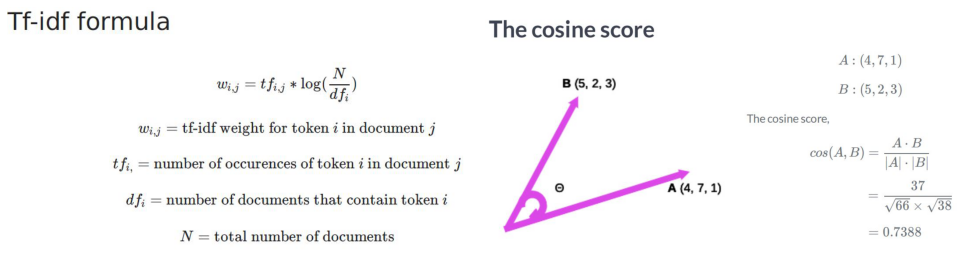

In [120]:
plot_2('tf-idf_formula', 'cosine_score', wspace=0.01)

In [121]:
# Tf-idf
print("TfidfModel\n")

from gensim.corpora.dictionary import Dictionary

words_dreams = [regexp_tokenize(w.lower(), '\w+') for w in b_df.dream if w not in stopwords.words('english')]

dictionary = Dictionary(words_dreams)

corpus = [dictionary.doc2bow(d) for d in words_dreams]

n = 90
doc = corpus[n]   #nth dream

##################################################################################

# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# tfidf weights of the dream in question
tfidf_weights = tfidf[doc]

# Print the weights
print("word_id and weights of dream number {}:\n".format(n+1), tfidf_weights)

########################################
print("\n")

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
print("Top 5 weighted words of dream number {}:\n".format(n+1))
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)


<>:6: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
<ipython-input-121-e66f11d9c272>:6: DeprecationWarning: invalid escape sequence \w
  words_dreams = [regexp_tokenize(w.lower(), '\w+') for w in b_df.dream if w not in stopwords.words('english')]


TfidfModel

word_id and weights of dream number 91:
 [(1, 0.004240276414965271), (11, 0.027797627939657805), (14, 0.007843777852117212), (17, 0.26224276936327295), (22, 0.002387663339249545), (27, 0.02817048243692197), (33, 0.03243484073805064), (35, 0.0727196971204746), (45, 0.05494960349215855), (51, 0.015957729753389518), (55, 0.044477893444227486), (57, 0.02846143770640653), (60, 0.010854327429568909), (80, 0.17097357112022746), (91, 0.017036066463038638), (95, 0.013948941710674036), (96, 0.11015146611946668), (99, 0.06098293355089554), (134, 0.038422365975701915), (137, 0.04141036652532058), (242, 0.055296444127732186), (348, 0.03712403554064324), (397, 0.09112801538480388), (401, 0.0646047450934282), (434, 0.0879660700421454), (447, 0.22941149427137272), (628, 0.09355249384481903), (764, 0.10361164415844486), (914, 0.14169567512976375), (979, 0.21782604682717888), (1254, 0.28981430793655877), (1265, 0.18756939525528932), (1316, 0.1730957247689292), (1630, 0.1862026637781139), (16

**TfidfVectorizer**

In [122]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(b_df['dream']) # corpus  

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(4254, 17775)


**Cosine similarity** (based on a TfidfVectorizer)

In [123]:
# Cosine similarity matrix of a corpus

from sklearn.metrics.pairwise import cosine_similarity

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.41982788 0.15100535 ... 0.01343663 0.05622309 0.01970437]
 [0.41982788 1.         0.20994922 ... 0.         0.         0.00851512]
 [0.15100535 0.20994922 1.         ... 0.02788949 0.031439   0.04758684]
 ...
 [0.01343663 0.         0.02788949 ... 1.         0.09715663 0.10971375]
 [0.05622309 0.         0.031439   ... 0.09715663 1.         0.21502909]
 [0.01970437 0.00851512 0.04758684 ... 0.10971375 0.21502909 1.        ]]


In [124]:
# Most similar dreams
similar_df = pd.DataFrame(cosine_sim)
most_similar_df = pd.DataFrame(columns=['most_similar', 'cosine_value'])

for i in range(len(similar_df)): 
    # i: columns. We want the 2nd largest
    most_similar_df.loc[i] = [similar_df[i].sort_values(ascending=False).index[1], 
                              similar_df[i].sort_values(ascending=False).reset_index(drop=True)[1]]

# the index is the dream number
most_similar_df.head()

,most_similar,cosine_value
0,1.0,0.419828
1,0.0,0.419828
2,28.0,0.267788
3,117.0,0.402027
4,21.0,0.298360


In [125]:
# checking validity
# sort by cosine values
print(most_similar_df.sort_values('cosine_value', ascending=False).head(8), 
      "\nwe see that there are not always 2 repetitions on the cosine_value column. \n")

# There are no equal cosine values [when we don't count with the other side of the diagonal matrix (a with b | b with a)]
print(most_similar_df['cosine_value'].value_counts().head())
print("we can drop duplicates.")

      most_similar  cosine_value
1168        1167.0      0.989637
1167        1168.0      0.989637
2752         940.0      0.682241
940         2752.0      0.682241
972          940.0      0.627544
3115        3828.0      0.605066
3828        3115.0      0.605066
146          184.0      0.588106 
we see that there are not always 2 repetitions on the cosine_value column. 

0.213382    2
0.417413    2
0.302685    2
0.389086    2
0.327055    2
Name: cosine_value, dtype: int64
we can drop duplicates.


In [126]:
# Most similar dream

# the n most similar dreams we want
cs_n = 4

# most_similar_df sorted by cs value and removing duplicates (we can do it as we've seen above)
sort_by_cosine = most_similar_df.sort_values('cosine_value', ascending=False).drop_duplicates(subset='cosine_value')

print("""The {} highest Cosine Similarity value is {}, between the dreams number {} and {}.\n""".format(
    cs_n,
    sort_by_cosine.iloc[cs_n - 1].cosine_value,
    sort_by_cosine.iloc[cs_n - 1].most_similar,
    sort_by_cosine.index[cs_n - 1]))

# dream 
print("""Dream number {} (Date: {}): \n {}\n""".format(
    sort_by_cosine.iloc[cs_n - 1].most_similar,
    b_df['dream_date'].reset_index(drop=True)[sort_by_cosine.iloc[cs_n - 1].most_similar],
    b_df['dream'].reset_index(drop=True)[sort_by_cosine.iloc[cs_n - 1].most_similar]))

# dream 
print("""Dream number {} (Date: {}): \n {}""".format(
    sort_by_cosine.index[cs_n - 1],
    b_df['dream_date'].reset_index(drop=True)[sort_by_cosine.index[cs_n - 1]],
    b_df['dream'].reset_index(drop=True)[sort_by_cosine.index[cs_n - 1]]))

The 4 highest Cosine Similarity value is 0.6050663995523553, between the dreams number 3828.0 and 3115.

Dream number 3828.0 (Date: 05/29/00): 
 ["Weird cake."] I made a cake. I am frosting it. This is for some special presentation for a group of people. The loaf cake breaks in two or three pieces. I place it back together and spread the chocolate frosting on the top. Then I drizzle some extra chocolate on the top of the frosting. It makes a pretty pattern. Then I have more frosting left, so I begin to plop big blobs of it on the cake and ruin the pretty look of it. However, it does have lots of chocolate and tastes great.

Dream number 3115 (Date: 01/31/97): 
 I am in an audience, waiting for the reception to begin. The huge cake with chocolate and white frosting on it is at the front of the room. I am seated in the front row at the far right. I notice that the cake has far too much frosting on it and is dropping as the chocolate globs drift down the sides. I want to help, so I go and

 - **Get similar dreams** of a certain dream ("Recommendations")

In [127]:
# Define a "get similar dream" function: kind of like a recommendations function

def get_similar_dreams(df, index_nr, n=1, vectorizer=TfidfVectorizer(), sim_cosine=cosine_similarity): # added sim_cosine
    'Get the N most similar dreams, with regard to cosine similarity'
    
    # define the cosine similarity matrix dataframe, based on a TfidfVectorizer
    tfidf_matrix_ = vectorizer.fit_transform(df['dream'])
    cosine_sim_ = sim_cosine(tfidf_matrix_, tfidf_matrix_)
    similar_df_ = pd.DataFrame(cosine_sim_)
    
    # define the similarity values and dream indexes
    N = n + 1
    cosine_nrs = list(similar_df_[index_nr].sort_values(ascending=False)[1:N])
    dreams_nrs = list(similar_df_[index_nr].sort_values(ascending=False).index[1:N])
    
    # print the dream
    print("Dream:\n", df['dream'].reset_index(drop=True)[index_nr], "\n")
    
    # print similarity values and the dream text
    for i in range(n):
        print("""With a cosine similarity value of {}, the {} most similar dream is: \n {}\n""".format(
        round(cosine_nrs[i], 3), i+1, df['dream'].reset_index(drop=True)[dreams_nrs[i]]))

        
# example 
get_similar_dreams(b_df, index_nr=6, n=2)
    

Dream:
 I had a Salvador Dali dream where I am in the VW bus with my parents and fire balls fall from the sky and land all around us like bombs. Things are melted on the desert landscape. It's out of proportion, with perspective lines off to a distant point. 

With a cosine similarity value of 0.215, the 1 most similar dream is: 
 ["Bombs."] A group of people oppose us. We try and talk with them. It doesn't work. I threaten to bomb them. They ignore me. I throw bombs at them and they scatter. The bombs are powerful and they capitulate. Now I am building communication with them so we can work together.

With a cosine similarity value of 0.186, the 2 most similar dream is: 
 ["Dwight yanked up into the sky."] I am in a house where my parents live. It's time to fix dinner and apparently I am the only one in the house that does any work. Oh well, I don't mind helping my mother who works so hard. I begin opening drawers to see what's available. I see things have been moved around. I see the

In [128]:
# example - change vectorizer parameters
get_similar_dreams(b_df, index_nr=6, n=2, 
                   vectorizer=TfidfVectorizer(stop_words='english', ngram_range=(1,2)))

Dream:
 I had a Salvador Dali dream where I am in the VW bus with my parents and fire balls fall from the sky and land all around us like bombs. Things are melted on the desert landscape. It's out of proportion, with perspective lines off to a distant point. 

With a cosine similarity value of 0.093, the 1 most similar dream is: 
 I am driving a VW bus and enjoying the experience. It's been a long time.

With a cosine similarity value of 0.08, the 2 most similar dream is: 
 ["Bombs."] A group of people oppose us. We try and talk with them. It doesn't work. I threaten to bomb them. They ignore me. I throw bombs at them and they scatter. The bombs are powerful and they capitulate. Now I am building communication with them so we can work together.



In [129]:
# NOTES
# - with stopwords seem to work better
# - ngram_range=(1,2) seems a good option as well (did not try trigrams, etc)

# try... tokenizer (preprocess?) + max_df + max_features + use_idf + ... ajustar consoante as características do sonho
# em questão ?

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [130]:
# CountVectorizer
get_similar_dreams(b_df, index_nr=6, n=2, vectorizer=CountVectorizer(stop_words='english'))

Dream:
 I had a Salvador Dali dream where I am in the VW bus with my parents and fire balls fall from the sky and land all around us like bombs. Things are melted on the desert landscape. It's out of proportion, with perspective lines off to a distant point. 

With a cosine similarity value of 0.191, the 1 most similar dream is: 
 ["Ashes, ashes, we all fall down."] I am in a house. I suddenly notice that the sky is black as if it were night, but it is still daylight. I am concerned. What is happening? I look out the window to get a better view. Now I see black snow like things falling down from the sky. I wonder if they are ashes from a fire, or toxic poisonous stuff. I go into another room and am organizing things. I see index cards I can use to write notes on.

With a cosine similarity value of 0.178, the 2 most similar dream is: 
 I am on a Dream Bus. A group of us are doing a dream workshop on the bus. It's a bit hectic and crowded. On my right sits a man I like and he likes me. H

In [131]:
# based on a text

def similar_to_text(text, df, index_nr=0, n=1, vectorizer=TfidfVectorizer()):
    'Get the N most similar dreams to an example of mine, with regard to cosine similarity'
    # add the text to the df
    df_dreams = pd.Series(text).append(df['dream'], ignore_index=True)
    
    # define the cosine similarity matrix dataframe, based on a TfidfVectorizer
    tfidf_matrix_ = vectorizer.fit_transform(df_dreams)
    cosine_sim_ = cosine_similarity(tfidf_matrix_, tfidf_matrix_)
    similar_df_ = pd.DataFrame(cosine_sim_)
    
    # define the similarity values and dream indexes
    N = n + 1
    cosine_nrs = list(similar_df_[index_nr].sort_values(ascending=False)[1:N])
    dreams_nrs = list(similar_df_[index_nr].sort_values(ascending=False).index[1:N])
    
    # print the dream
    print("Dream:\n", df_dreams[index_nr], "\n")
    
    # print similarity values and the dream text
    for i in range(n):
        print("""With a cosine similarity value of {}, the {} most similar dream is: \n {}\n""".format(
        round(cosine_nrs[i], 3), i+1, df['dream'].reset_index(drop=True)[dreams_nrs[i]]))

###################################################################################################################

# try "n_gram testing"
text = """It was a not so phenomenal dream envolving a friend of mine and a friend of my dad. I was not happy.
Not so cool. This is just a test. Then Alfred came up and said he wanted to watch a documentary and read simultaneously."""
        
# example 
similar_to_text(text, b_df, n=2)

Dream:
 It was a not so phenomenal dream envolving a friend of mine and a friend of my dad. I was not happy.
Not so cool. This is just a test. Then Alfred came up and said he wanted to watch a documentary and read simultaneously. 

With a cosine similarity value of 0.205, the 1 most similar dream is: 
 I had center coverage at 1:30 in the morning. The phone rang. It was Claire K, a client, then she changed to Ernie. He was threatening me. He was going to kill me. He was standing outside my locked door. I could see his feet through the crack at the bottom of the door. I quietly picked up the phone to call the police. The line was busy (twice).

With a cosine similarity value of 0.195, the 2 most similar dream is: 
 I was in New York City. Some earthquake had struck. I was going to go into the hospital both to help others and to be a patient. The windows were broken out. There were big mud blots on the outside of the building. A broken water pipe was gushing into one of the rooms. I thou

In [132]:
# example - change vectorizer parameters
similar_to_text(text, b_df, n=2, 
                vectorizer=TfidfVectorizer(stop_words='english', ngram_range=(1,2)))


Dream:
 It was a not so phenomenal dream envolving a friend of mine and a friend of my dad. I was not happy.
Not so cool. This is just a test. Then Alfred came up and said he wanted to watch a documentary and read simultaneously. 

With a cosine similarity value of 0.056, the 1 most similar dream is: 
 Earlier, I dreamed about Mabel. She never gets parties thrown for her and I'm going to.

With a cosine similarity value of 0.05, the 2 most similar dream is: 
 I am writing on a cushion I've drawn pictures on. I use a blue pen, that can't xerox. The pictures are like embroidery or needlepoint. I step back to see what it looks like. You can hardly see the writing. There is a small round cushion on the square large outside cover. I consider getting a better-fitting inside piece. A daughter asks me a favor to go with her to exchange a bottle at a store. I tell her I'm tired and have much to do, but we go, with several wives of my ex-husband. It's 1 or 2 in the morning. I look around in the 

In [133]:
# example - change vectorizer parameters
similar_to_text(text, b_df, n=2, 
                vectorizer=TfidfVectorizer(stop_words='english', ngram_range=(2,2)))


Dream:
 It was a not so phenomenal dream envolving a friend of mine and a friend of my dad. I was not happy.
Not so cool. This is just a test. Then Alfred came up and said he wanted to watch a documentary and read simultaneously. 

With a cosine similarity value of 0.042, the 1 most similar dream is: 
 Earlier, I dreamed about Mabel. She never gets parties thrown for her and I'm going to.

With a cosine similarity value of 0.035, the 2 most similar dream is: 
 A Philip dream. I think about my Uncle Philip. Something about 2 Philip's and they vied for my attention.



#### Define similar using the variable polarity with a vectorizer

In [134]:
# Define a "get similar dream" function: kind of like a recommendations function

def get_similar_pol(df, index_nr, st_dev=1, n=1, vectorizer=TfidfVectorizer()):
    'Get the N most similar dreams, with regard to cosine similarity, restricting the data using the variable polarity'
    
    # using std
    std = st_dev * np.std(df['polarity'])
    polarity_value = df['polarity'].iloc[index_nr]
    upper_bound = min(1, polarity_value + std)
    lower_bound = max(-1, polarity_value - std)
    
    # filter dataset
    filtered_df = df[(df['polarity'] < upper_bound) & (df['polarity'] < lower_bound)]
    
    # define the cosine similarity matrix dataframe, based on a TfidfVectorizer
    tfidf_matrix_ = vectorizer.fit_transform(filtered_df['dream'])
    cosine_sim_ = cosine_similarity(tfidf_matrix_, tfidf_matrix_)
    similar_df_ = pd.DataFrame(cosine_sim_)
    
    # define the similarity values and dream indexes
    N = n + 1
    cosine_nrs = list(similar_df_[index_nr].sort_values(ascending=False)[1:N])
    dreams_nrs = list(similar_df_[index_nr].sort_values(ascending=False).index[1:N])
    
    # print the dream
    print("Dream:\n", df['dream'].reset_index(drop=True)[index_nr], "\n")
    
    # print similarity values and the dream text
    for i in range(n):
        print("""With a cosine similarity value of {}, the {} most similar dream is: \n {}\n""".format(
        round(cosine_nrs[i], 3), i+1, df['dream'].reset_index(drop=True)[dreams_nrs[i]]))

        
# example 
get_similar_pol(b_df, index_nr=0, n=2, st_dev=1)

Dream:
 I had the neatest dream about Blake, me, Reta and Bill E. 

With a cosine similarity value of 0.24, the 1 most similar dream is: 
 I was in prison. My "man" and I were cell mates. My "husband" was also in prison. I think we were there because of what he did. I had done a needlepoint thing that was thick and looked like sheepskin. We were trying to figure out how to block it. A man (my husband) said, "Why not wrap it around your body and go take a steam bath." I looked at him and said, "What a good idea." I wrapped it around me and wrapped a towel around it to cover it. I walked down the hall to the public bathroom. At first, I couldn't find the steam bath, just the toilet stalls. Then I saw 2. A large woman got to it first. I was agitated because I didn't want to get caught. I saw a sign-up sheet, so I signed my name, "Barb Sanders." The pencil was on a string and almost didn't reach and the writing was crooked, slanted uphill. Just as I finished writing my name, the woman got 

In [135]:
# example 
get_similar_pol(b_df, index_nr=0, n=2, st_dev=1, vectorizer=CountVectorizer(stop_words='english'))

Dream:
 I had the neatest dream about Blake, me, Reta and Bill E. 

With a cosine similarity value of 0.232, the 1 most similar dream is: 
 I was in prison. My "man" and I were cell mates. My "husband" was also in prison. I think we were there because of what he did. I had done a needlepoint thing that was thick and looked like sheepskin. We were trying to figure out how to block it. A man (my husband) said, "Why not wrap it around your body and go take a steam bath." I looked at him and said, "What a good idea." I wrapped it around me and wrapped a towel around it to cover it. I walked down the hall to the public bathroom. At first, I couldn't find the steam bath, just the toilet stalls. Then I saw 2. A large woman got to it first. I was agitated because I didn't want to get caught. I saw a sign-up sheet, so I signed my name, "Barb Sanders." The pencil was on a string and almost didn't reach and the writing was crooked, slanted uphill. Just as I finished writing my name, the woman got

**Word embeddings & computing similarities**

In [136]:
%%time

# dataframe with all the dreams
word_emb = pd.DataFrame()
word_emb['dream_doc'] = [nlp(i) for i in b_df['dream']]
word_emb['most_similar'], word_emb['similarity_score'] = np.nan, np.nan

word_emb.head()

Wall time: 3min 46s


,dream_doc,most_similar,similarity_score
0,"(I, had, the, neatest, dream, about, Blake, ,,...",NaN,NaN
1,"(I, had, another, neat, dream, about, Blake, .)",NaN,NaN
2,"(I, had, a, dream, that, Nate, came, back, and...",NaN,NaN
3,"(For, the, second, night, in, a, row, ,, I, dr...",NaN,NaN
4,"(I, Did, n't, dream, as, last, night, before, ...",NaN,NaN


In [137]:
%%time
%%script false
warnings.filterwarnings('ignore')

# continuation
for i, j in enumerate(word_emb['dream_doc']):
    scores = []
    for doc in word_emb['dream_doc']:
        scores.append(doc.similarity(j))
    word_emb['similarity_score'].loc[i] = np.sort(scores)[-2] # second largest
    word_emb['most_similar'].loc[i] = np.argsort(scores)[-2] # second largest index
    

warnings.filterwarnings('default')

Couldn't find program: 'false'
Wall time: 8.99 ms


### KMeans clustering

## 3) Text Representation & Feature Engineering
<a id="fe"></a>

## 4) Modeling / Pattern Mining
<a id="modeling"></a>

## Supervised Learning

In [138]:
# number of times a word appears

# all words
CountVectorizer().fit(dreams_df.dream).get_feature_names()[:15]  

# nltk
from nltk.tokenize import word_tokenize
# [word_tokenize(d) for d in dreams_df.dream]   # slower

## ML Models: predict features of the data

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


### CountVectorizer() 

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
# dream example
text = [dreams_df['dream'][0]]
print("Dream example:\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer()

# call 'fit' to build the vocabulary
vectorizer.fit(text)

# calling 'transform' to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# 'get_feature_names()' tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# the bag of words treatment doesn't preserve information about the order of words, just their frequency

Dream example:
The one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a little bridge over a creek, then double back and she drops me off at the house again. Inside (?) I sit with a couple of people, playing with a string of blue balloons.

Transformed text vector is 
[[1 1 4 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2
  1 1 3 1 3 3 

In [142]:
# total number of unique words
vectorizer = CountVectorizer()

vectorizer.fit(dreams_df['dream'])

print("Total number of unique words: {}".format(len(vectorizer.get_feature_names())))
print("Total number of unique dreams: {}".format(len(dreams_df.dream.unique())))  # só há 1 repetido

Total number of unique words: 35380
Total number of unique dreams: 19430


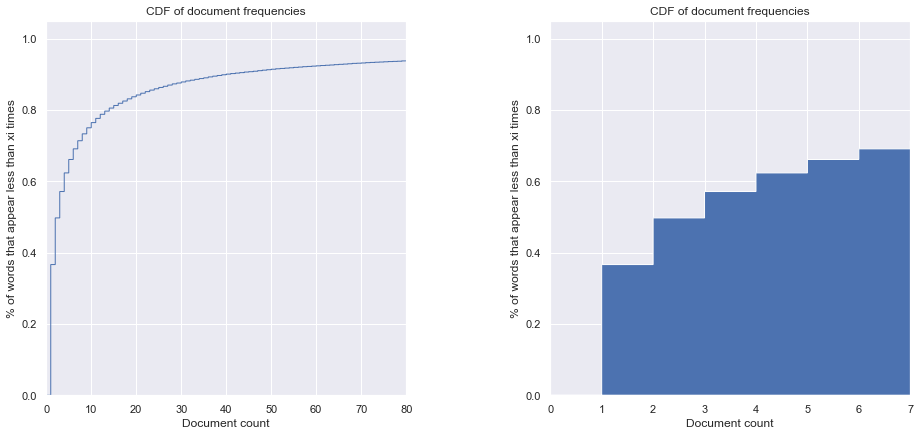

In [143]:
# cumulative distribution (CDF) of document frequencies - df

# bag of words
X = vectorizer.fit_transform(dreams_df.dream)

doc_freq = pd.Series(sorted(np.sum(X > 0, axis=0).tolist()[0]))
cum = np.arange(np.sum(doc_freq))

# plot 
plt.subplot(1, 2, 1)
plt.hist(doc_freq, cum, density=True, cumulative=True, histtype='step')
plt.xlim(0,80)
plt.title("CDF of document frequencies")
plt.xlabel("Document count")
plt.ylabel("% of words that appear less than xi times")
plt.xticks(range(0, 81, 10))

# zoomed version
plt.subplot(1, 2, 2)
plt.hist(doc_freq, cum, density=True, cumulative=True, histtype='stepfilled')
plt.xlim(0,6)
plt.title("CDF of document frequencies")
plt.xlabel("Document count")
plt.ylabel("% of words that appear less than xi times")
plt.xticks(range(8))

plt.subplots_adjust(left=0, bottom=-0.3, right=2, top=1, wspace=0.4, hspace=0)
plt.show()

# min_df = 3 ?
# max_df = 20 ?

In [144]:
np.sum(X, axis=0).tolist()[0]
cum

array([      0,       1,       2, ..., 1634700, 1634701, 1634702],
      dtype=int64)

In [145]:
# min_df could be = 1 & max_df could be 25 or 30

In [146]:
pd.get_dummies(dreams_df['id']).head()

,alta,angie,arlie,b,b2,bay_area_girls_456,bay_area_girls_789,bea1,bea2,blind-f,...,phil3,physiologist,ringo,samantha,seventh_graders,toby,tom,ucsc_women,vickie,west_coast_teens
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data (X)

In [147]:
n = 10
top_dreamers = dreams_df['name'].value_counts(ascending=True).tail(n)

# top 10 dreamers
use_df = dreams_df[dreams_df.name.isin(top_dreamers.index)]

# X
X = dreams_df['dream']
X_top_dreamers = use_df['dream']

## Target (y)

In [148]:
# y
y = dreams_df['sex']
y_top_dreamers = use_df['sex']

### CountVectorizer() and MultinomialNB()

In [149]:
from sklearn.naive_bayes import MultinomialNB

All

In [150]:
# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# spaCy stopwords
stopwords_spacy = spacy.lang.en.stop_words.STOP_WORDS

# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords_spacy]
    return ' '.join(a_lemmas)

# pelo menos com o MultinomialNB o score fica ligeiramente pior com o pre-processamento

In [151]:
%%time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# features & target
X = dreams_df['dream'].apply(preprocess)  # the score on the test set goes down to 0.8389
y = dreams_df['sex']

# split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(min_df=5)   # insert cut-off (min_df) for the next analysis (probs of the classifier)

count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


# MultinomialNB() classifier with default parameters.
classifier = 'MultinomialNB'
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

# score
print("train Accuracy score: {}".format(accuracy_score(y_train, nb_classifier.predict(count_train))))
print("test Accuracy score: {}".format(accuracy_score(y_test, pred)), "\n")

train Accuracy score: 0.8661127858245717
test Accuracy score: 0.8307032590051457 

Wall time: 4min 15s


What are the **strongly predictive features/words**? (cut-off = 5)

In [152]:
# For this classifier, nb_classifier:

# all words separated on an array
words = np.array(count_vectorizer.get_feature_names())

# predict probability of sex based on each word
probs = nb_classifier.predict_log_proba(count_vectorizer.transform(words)) # predict prob sex based on each word

# sort the rows by predicted probabilities, and pick the top and bottom K rows
K = 10
# indices of: given it is a Female, the highest probability of having the words
ind_female = pd.Series(probs[:, 0]).sort_values(ascending=False).head(K).index

# indices of: given it is a Male, the highest probability of having the words
ind_male = pd.Series(probs[:, 1]).sort_values(ascending=False).head(K).index

# given the dream is classified as male or female, the most likely words to appear are
print("""For this classifier, {}, given the dream is classified as male or female, the top {} most likely words to 
appear/predict are""".format('nb_classifier', K))

df_nb_clf = pd.DataFrame({'female words': words[ind_female], 'male words': words[ind_male]})
df_nb_clf

For this classifier, nb_classifier, given the dream is classified as male or female, the top 10 most likely words to 
appear/predict are


,female words,male words
0,li,ramona
1,jeremy,brimson
2,charla,redding
3,feelings,ramos
4,thoughts,niles
5,dora,gino
6,dwight,zelling
7,ginny,wilmerton
8,bl,bubba
9,dovre,bonita


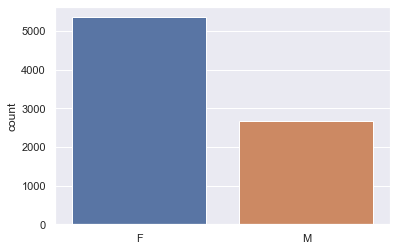

In [153]:
# predictions
sns.countplot(nb_classifier.predict(count_vectorizer.transform(words)))
plt.show()

In [154]:
nb_classifier.predict(count_vectorizer.transform(words)) # para ver depois se probs[:, 0] ou probs[:, 1] é F ou M

array(['F', 'F', 'F', ..., 'M', 'F', 'F'], dtype='<U1')

In [155]:
%%time
# and... ?

# ver se isto faz sentido também uma vez que há disparidade na distribuição dos sonhos. Alguns podem utilizar determinadas
# palavras várias vezes e distorcer o modelo

# POS tags

# NER

# --> Comparar o que o nb_classifier prevê com maior probabilidade com as palavras que efetivamente aparecem mais em F e M

# --> Fazer POS tags dos dados F e M; NER também; (como fiz para o caso individual da Barb Sanders); e comparar outra vez
#     com o que o modelo prevê

#################

# verificar quantas vezes aparecem certas palavras
all_words_all_dreams = ' '.join([i for i in dreams_df['dream']])
all_words_all_dreams = word_tokenize(all_words_all_dreams)

counter_all = Counter(all_words_all_dreams)
counter_all['li'] # ?

Wall time: 43.1 s


0

**Mais hipóteses**

- **1) Build a Naive Bayes model where the features are n-grams instead of words.** N-grams are phrases containing n words next to each other: a bigram contains 2 words, a trigram contains 3 words, and 6-gram contains 6 words. This is useful because "not good" and "so good" mean very different things. On the other hand, as n increases, the model does not scale well since the feature set becomes more sparse.

In [156]:
%%time
# Generating ngrams

# CountVectorizer object
count_vectorizer_2 = CountVectorizer(ngram_range=(1, 3), min_df=5)   # ngram_range=(1, 4) --> 0.84562

count_train = count_vectorizer_2.fit_transform(X_train)
count_test = count_vectorizer_2.transform(X_test)

# MultinomialNB() classifier with default parameters.
classifier = 'MultinomialNB'
nb_classifier_2 = MultinomialNB()

nb_classifier_2.fit(count_train, y_train)

pred_2 = nb_classifier_2.predict(count_test)

# score
print("train Accuracy score: {}".format(accuracy_score(y_train, nb_classifier_2.predict(count_train))))
print("test Accuracy score: {}".format(accuracy_score(y_test, pred_2)), "\n")
print("""The score improved from {} to {} with 3-grams""".format(round(accuracy_score(y_test, pred), 3), 
                                                                 round(accuracy_score(y_test, pred_2), 3)))

train Accuracy score: 0.9030953606352474
test Accuracy score: 0.8370497427101201 

The score improved from 0.831 to 0.837 with 3-grams
Wall time: 10.6 s


- **2) Try a model besides Naive Bayes**, one that would allow for interactions between words -- for example, a Random Forest classifier.

In [157]:
# Ver abaixo o Logistic Regression e tentar as outras opções também (n-grams, etc)

- **3) Try adding supplemental features** -- number of words, number of sentences, readability score; 

In [158]:
%%time
import textatistic

# Number of words in a dream (textatistic)
def nr_words(text):
    return textatistic.word_count(text)

# Number of sentences in a dream (textatistic)
def nr_sents(text):
    if textatistic.sent_count(text) == 0:
        return 1
    else:
        return textatistic.sent_count(text)

#############################

# dataframe to model
df_supp = pd.DataFrame({'processed_text': dreams_df['dream'].apply(preprocess), # fazendo o preprocessamento fica pior
                        'number_words': dreams_df['dream'].apply(nr_words),
                        'number_sentences': dreams_df['dream'].apply(nr_sents),
                        'readability_dalechall': dreams_df['dalechall_score'],
                        'label_sex': dreams_df['sex']})

df_supp.head()

Wall time: 4min 4s


,processed_text,number_words,number_sentences,readability_dalechall,label_sex
0,Meads house big inside european village inside...,165,10,5.890355,F
1,public place remind grocery store dream lot ai...,69,4,6.322825,F
2,drive car south downtown like dream big space ...,228,10,6.637248,F
3,bunch people work sort cabin like place work t...,406,22,6.263077,F
4,house think map important belong people includ...,98,4,7.268537,F


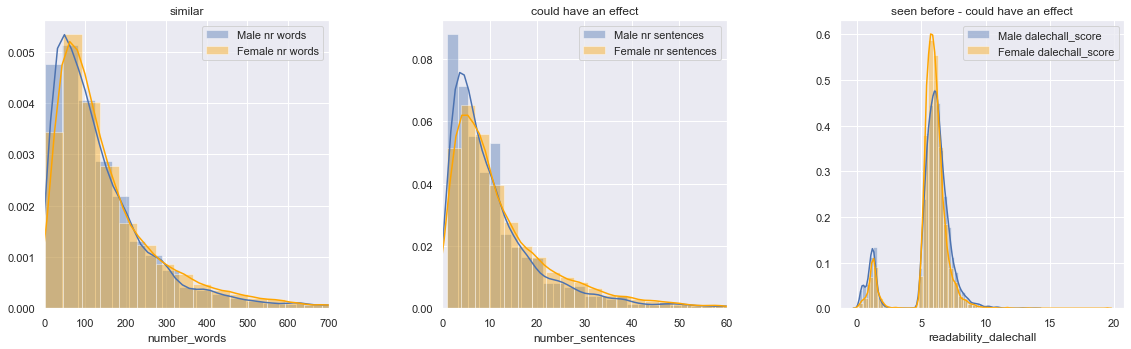

In [159]:
# gender nr words
plt.subplot(1, 3, 1)
sns.distplot(df_supp[df_supp['label_sex'] == 'M']['number_words'])
sns.distplot(df_supp[df_supp['label_sex'] == 'F']['number_words'], color='orange')
plt.xlim(0, 700)
plt.legend(['Male nr words', 'Female nr words']); plt.title("similar")

# gender nr sentences
plt.subplot(1, 3, 2)
sns.distplot(df_supp[df_supp['label_sex'] == 'M']['number_sentences'])
sns.distplot(df_supp[df_supp['label_sex'] == 'F']['number_sentences'], color='orange')
plt.xlim(0, 60)
plt.legend(['Male nr sentences', 'Female nr sentences']); plt.title("could have an effect")

# readability score: Dale-Chall splited better between gender
plt.subplot(1, 3, 3)
sns.distplot(df_supp[df_supp['label_sex'] == 'M']['readability_dalechall'].dropna())
sns.distplot(df_supp[df_supp['label_sex'] == 'F']['readability_dalechall'].dropna(), color='orange')
plt.legend(['Male dalechall_score', 'Female dalechall_score']); plt.title("seen before - could have an effect")

plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.4, hspace=0)
plt.show()

In [160]:
# word 'feelings'
word_feelings = []
for i in range(len(dreams_df['dream'])): # with preprocessing it doesn't appear
    if 'feelings' in dreams_df['dream'][i]:
        word_feelings.append(1)
    else:
        word_feelings.append(0)
        
df_supp['word_feelings'] = word_feelings
print(df_supp.word_feelings.value_counts())
print(df_supp[df_supp['label_sex'] == 'F'].word_feelings.value_counts())
df_supp.head()

0    19180
1      251
Name: word_feelings, dtype: int64
0    11541
1      207
Name: word_feelings, dtype: int64


,processed_text,number_words,number_sentences,readability_dalechall,label_sex,word_feelings
0,Meads house big inside european village inside...,165,10,5.890355,F,0
1,public place remind grocery store dream lot ai...,69,4,6.322825,F,0
2,drive car south downtown like dream big space ...,228,10,6.637248,F,0
3,bunch people work sort cabin like place work t...,406,22,6.263077,F,0
4,house think map important belong people includ...,98,4,7.268537,F,0


In [161]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

# vectorizer
count_vectorizer_3 = CountVectorizer(ngram_range=(1, 3), min_df=5) 

# FunctionTransformer --> só seleciona as colunas e põem-nas num formato que o Pipeline entende
get_text_data = FunctionTransformer(lambda x: x['processed_text'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['number_sentences']], validate=False) # 0.8476 test
#get_numeric_data = FunctionTransformer(lambda x: x[['number_sentences', 'readability_dalechall']], validate=False) # 0.846
#get_numeric_data = FunctionTransformer(lambda x: x[['number_words', 'number_sentences']], validate=False) # 0.8475 test
#get_numeric_data = FunctionTransformer(lambda x: x[['number_words', 'word_feelings']], validate=False) # 0.846 test

# FeatureUnion Text and Numeric Features
numeric_pipeline = Pipeline([('selector', get_numeric_data)])   
text_pipeline = Pipeline([('selector', get_text_data), ('vectorizer', count_vectorizer_3)])

# Final pipeline
pl = Pipeline([('union', FeatureUnion([('numeric', numeric_pipeline), ('text', text_pipeline)])),  #union
               ('clf', MultinomialNB())                                  #classifier
              ])

# features & target
X_2 = df_supp.drop(['label_sex'], axis=1)
y_2 = df_supp['label_sex']

# split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=1)

# Fit pl to the training data
pl.fit(X_train, y_train)

pred_3 = pl.predict(X_test)

# score
print("train Accuracy score: {}".format(accuracy_score(y_train, pl.predict(X_train))))
print("test Accuracy score: {}".format(accuracy_score(y_test, pred_3)), "\n")
print("""The score improved from {} to {} with these 1 more numeric feature (with n-grams as well).\n""".format(
    round(accuracy_score(y_test, pred_2), 3), round(accuracy_score(y_test, pred_3), 3)))

train Accuracy score: 0.9025071685905448
test Accuracy score: 0.8387650085763293 

The score improved from 0.837 to 0.839 with these 1 more numeric feature (with n-grams as well).



- **4) Use word2vec or [Latent Dirichlet Allocation]** (https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) to group words into topics and use those topics for prediction.

In [162]:
# fazer depois

- **5) Use TF-IDF weighting instead of word counts.**

In [163]:
%%time
# vectorizer
count_vectorizer_3 = TfidfVectorizer()   # ngram_range=(1, 3)

count_train = count_vectorizer_3.fit_transform(X_train)
count_test = count_vectorizer_3.transform(X_test)

# MultinomialNB() classifier with default parameters.
classifier = 'MultinomialNB'
nb_classifier_3 = MultinomialNB()

nb_classifier_3.fit(count_train, y_train)

pred_3 = nb_classifier_3.predict(count_test)

# score
print("train Accuracy score: {}".format(accuracy_score(y_train, nb_classifier_3.predict(count_train))))
print("test Accuracy score: {}".format(accuracy_score(y_test, pred_3)), "\n")
print("""The score went from {} to {} with TfidfVectorizer""".format(0.831, 
                                                                 round(accuracy_score(y_test, pred_3), 3)))

C:\Users\Admin\Anaconda3\lib\site-packages\_pytest\mark\structures.py:378: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


ValueError: Found input variables with inconsistent numbers of samples: [5, 13601]

In [164]:
##########################################

In [165]:
%%time
from sklearn.naive_bayes import ComplementNB

# ComplementNB() classifier with default parameters.
classifier = 'ComplementNB'
nb_classifier = ComplementNB()

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

# score
print("train Accuracy score: {}".format(accuracy_score(y_train, nb_classifier.predict(count_train))))
print("test Accuracy score: {}".format(accuracy_score(y_test, pred)), "\n")

ValueError: Found input variables with inconsistent numbers of samples: [5, 13601]

##### Outra maneira de fazer o mesmo - diferenças?

In [166]:
# features & target

X = CountVectorizer().fit_transform(dreams_df.dream)#.tocsc()
# X = dreams_df['dream'] 
y = dreams_df['sex'] #.values.astype(np.int)

classifier = 'MultinomialNB'

# Multinomial Naïve Bayes

# split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# MultinomialNB() classifier with default parameters.
multi_nb = MultinomialNB()

# train the classifier over the training set and test on the test set
multi_nb.fit(X_train, y_train)

y_pred = multi_nb.predict(X_test)

# accuracy scores for both the training and the test sets
print("Accuracy score for the training set: {}".format(multi_nb.score(X_train, y_train)))
print("Accuracy score for the test set: {}".format(multi_nb.score(X_test, y_test)))


Accuracy score for the training set: 0.8952282920373502
Accuracy score for the test set: 0.8380789022298456


In [167]:
# Tuning

from sklearn.model_selection import train_test_split, GridSearchCV

# hyperparameter grid
param_grid = {'alpha': np.arange(1.0e-10, 1, 0.1)}

grid_mnb = GridSearchCV(multi_nb, param_grid=param_grid, cv=5, iid=False)

grid_mnb.fit(X_train, y_train)

# hyperparametes & accuracy
print("\nTuned MultinomialNB Parameters: {}".format(grid_mnb.best_params_))
print('All: accuracy score for {} with tuning: {}'.format(classifier, grid_mnb.score(X_test, y_test)))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning



Tuned MultinomialNB Parameters: {'alpha': 0.9000000001}
All: accuracy score for MultinomialNB with tuning: 0.8379073756432247


#### Predictions

In [168]:
# sentence = dreams_df['dream'][0]  # alta dream
sentence = "I was talking with Jung and he was looking at me as if I knew something."
sentence

'I was talking with Jung and he was looking at me as if I knew something.'

In [169]:
# fit to build the vocabulary: dreams vocabulary
vectorizer = CountVectorizer().fit(dreams_df['dream'])   

# transform to convert the sentence to a bag of words
sentence_transformed = vectorizer.transform([sentence])

# Predict
print("Prediction of the sentence: {}".format(grid_mnb.predict(sentence_transformed)))


Prediction of the sentence: ['F']


In [170]:
(dreams_df.id == 'alta').values.astype(np.int)  # target: if it's alta id (1) or not (0)

array([1, 1, 1, ..., 0, 0, 0])

### CountVectorizer() and OneVsRestClassifier

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

#### LogisticRegression

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import HashingVectorizer

Top 10 dreamers

In [173]:
# 10 Top dreamers

# LogisticRegression
classifier = 'OneVsRestClassifier / LogisticRegression'

X_top_dreamers = use_df['dream']
y_top_dreamers = use_df['sex']

SEED = 2

X_train, X_test, y_train, y_test = train_test_split(X_top_dreamers, y_top_dreamers, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=10000)))])

pl.fit(X_train, y_train)

# accuracy
print('Top10: accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test))) #0.8550209880529545

#############################################

from sklearn.feature_extraction.text import HashingVectorizer

vec = HashingVectorizer(norm=None, ngram_range=(1, 2))

pl = Pipeline([('vec', vec), 
               ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=10000)))])

pl.fit(X_train, y_train)

# accuracy
print('Top10: accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))

Top10: accuracy score for OneVsRestClassifier / LogisticRegression without tuning: 0.9079754601226994
Top10: accuracy score for OneVsRestClassifier / LogisticRegression without tuning: 0.9163706813044882


#### Prediction

In [174]:
# sentence = dreams_df['dream'][0]  # alta dream
sentence = "I was talking with Jung and he was looking at me as if I knew something."
sentence

'I was talking with Jung and he was looking at me as if I knew something.'

In [175]:
# Predict
print("Prediction of the sentence: {}".format(pl.predict([sentence])))

Prediction of the sentence: ['M']


#### All dreamers

In [176]:
%%time
# All

# LogisticRegression
classifier = 'LogisticRegression'

X = dreams_df['dream']
y = dreams_df['sex']        # target

SEED = 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

###############################

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced',
                                                              solver='sag', max_iter=10000, random_state=SEED)))])

pl.fit(X_train, y_train)

# accuracy
print('All: accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test))) 

################################

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', LogisticRegression(class_weight='balanced',
                                          solver='sag', max_iter=10000, random_state=SEED))])

pl.fit(X_train, y_train)

# accuracy
print('All: accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test))) 


All: accuracy score for LogisticRegression without tuning: 0.8427336352408399
All: accuracy score for LogisticRegression without tuning: 0.8427336352408399
Wall time: 2min 31s


Tuning

In [177]:
%%script false    # ---> como fazer o tune dos hyperparameters qd se tem o CountVectorizer antes no Pipeline
%%time

# Tuning

pl_to_tune = Pipeline([('vec', CountVectorizer()), 
                     ('clf', LogisticRegression(class_weight='balanced',
                                                solver='sag', max_iter=10000, random_state=SEED))])

# hyperparameter grid
param_grid = {'C': [0, 1, 2], 'penalty': ['l1', 'l2']}

grid_logreg = GridSearchCV(pl_to_tune, param_grid=param_grid, cv=3, iid=False)

grid_logreg.fit(X_train, y_train)

# hyperparametes & accuracy
print("\nTuned Logistic Regression Parameters: {}".format(grid_logreg.best_params_))
print('All: accuracy score for {} with tuning: {}'.format(classifier, grid_logreg.score(X_test, y_test)))


Couldn't find program: 'false'


#### DecisionTreeClassifier

In [178]:
from sklearn.tree import DecisionTreeClassifier

All

In [179]:
%%time

classifier = 'DecisionTreeClassifier'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', DecisionTreeClassifier(class_weight='balanced'))])   

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))   # 0.4545080279950597

#############################################

# Tuning

##############################################

# Predictions



accuracy score for DecisionTreeClassifier without tuning: 0.722107863318238
Wall time: 14 s


#### RandomForestClassifier

In [180]:
from sklearn.ensemble import RandomForestClassifier

All

In [181]:
%%time

classifier = 'RandomForestClassifier'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced'))])

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))  

#############################################

# Tuning

##############################################

# Predictions


accuracy score for RandomForestClassifier without tuning: 0.7949773569370111
Wall time: 34.8 s


#### AdaBoostClassifier

In [182]:
from sklearn.ensemble import AdaBoostClassifier

All

In [183]:
%%time 

classifier = 'AdaBoostClassifier (DecisionTreeClassifier)'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
        ('clf', OneVsRestClassifier(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'))))]) 

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))  # 0.6414162206669412

#############################################

# Tuning

##############################################

# Predictions


accuracy score for AdaBoostClassifier (DecisionTreeClassifier) without tuning: 0.714491560312886
Wall time: 12 s


In [184]:
%%time

classifier = 'AdaBoostClassifier w/ LogisticRegression'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([
    ('vec', CountVectorizer()), 
    ('clf', OneVsRestClassifier(AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                                                     solver='lbfgs', max_iter=10000))))
    ])

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))  

#############################################                                                    

# Tuning

##############################################

# Predictions


accuracy score for AdaBoostClassifier w/ LogisticRegression without tuning: 0.4007822149032524
Wall time: 15.4 s


#### KNeighborsClassifier

In [185]:
from sklearn.neighbors import KNeighborsClassifier

All

In [186]:


classifier = 'KNeighborsClassifier'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', KNeighborsClassifier(n_neighbors=1))])   

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))    # 0.3108275010292301

#############################################

# Tuning

##############################################

# Predictions


accuracy score for KNeighborsClassifier without tuning: 0.6486208316179498


In [187]:
# save to excel
dreams_df.to_excel('dreams_df.xlsx')

## 5) Evaluation 
<a id="evaluation"></a>

## 6) Deployment

In [188]:
end_time = time.time()
total_time = end_time - start_time
print("""Time to run: {} minutes""".format(round(total_time/60, 1)))

Time to run: 71.2 minutes
